In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("tabpfn.csv", sep=";")
df

ID  openmlid  seed    algorithm         creation_date   status  \
0        1        14     0       tabpfn  10/25/2022, 04:54:10     done   
1        2        14     1       tabpfn  10/25/2022, 04:54:10     done   
2        3        14     2       tabpfn  10/25/2022, 04:54:10     done   
3        4        14     3       tabpfn  10/25/2022, 04:54:10     done   
4        5        14     4       tabpfn  10/25/2022, 04:54:10     done   
...    ...       ...   ...          ...                   ...      ...   
2035  2036     41946     5  naiveautoml  10/25/2022, 04:54:10     done   
2036  2037     41946     6  naiveautoml  10/25/2022, 04:54:10     done   
2037  2038     41946     7  naiveautoml  10/25/2022, 04:54:10  running   
2038  2039     41946     8  naiveautoml  10/25/2022, 04:54:10     done   
2039  2040     41946     9  naiveautoml  10/25/2022, 04:54:10     done   

                start_date     name   machine  test_accuracy  fitting_time  \
0     10/25/2022, 14:07:11  1165575  n2cn0536         0.8150           0.0   
1     10/25/2022, 14:17:01  1165578  n2cn0539         0.7960           0.0   
2     10/25/2022, 06:00:56  1164380  n2cn1134         0.8420           0.0   
3     10/25/2022, 14:02:17  1165572  n2cn0629         0.8210           0.0   
4     10/25/2022, 14:02:17  1165572  n2cn0629         0.8170           0.0   
...                    ...      ...       ...            ...           ...   
2035  10/25/2022, 14:02:19  1165576  n2cn0537         0.9769      309340.0   
2036  10/25/2022, 14:05:39  1165577  n2cn0538         0.9773      277673.0   
2037  10/25/2022, 14:33:34  1165575  n2cn0536            NaN           NaN   
2038  10/25/2022, 05:43:55  1164380  n2cn1134         0.9672      103143.0   
2039  10/25/2022, 05:23:33  1164379  n2cn1133         0.9769      246329.0   

                                                details              end_date  \
0                                                   NaN  10/25/2022, 14:09:22   
1                                                   NaN  10/25/2022, 14:19:45   
2                                                   NaN  10/25/2022, 06:03:17   
3                                                   NaN  10/25/2022, 14:04:46   
4                                                   NaN  10/25/2022, 14:04:51   
...                                                 ...                   ...   
2035  [[0.024, 0.0852, 1.2347, 1.2789, 3.4492, 4.510...  10/25/2022, 14:07:30   
2036  [[0.0141, 0.1596, 3.5514, 3.637, 8.4359, 9.242...  10/25/2022, 14:10:19   
2037                                                NaN                   NaN   
2038  [[0.0615, 0.1084, 3.0577, 3.0847, 7.7376, 8.31...  10/25/2022, 05:45:39   
2039  [[0.0393, 0.2558, 2.1258, 2.1775, 4.9672, 5.61...  10/25/2022, 05:27:40   

     error  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
...    ...  
2035   NaN  
2036   NaN  
2037   NaN  
2038   NaN  
2039   NaN  

[2040 rows x 14 columns]

In [42]:
comparisons = []
for openmlid, df_dataset in df.groupby("openmlid"):
    performances_tabpfn = df_dataset[df_dataset["algorithm"] == "tabpfn"]["test_accuracy"].dropna().values
    performances_naml = df_dataset[df_dataset["algorithm"] == "naiveautoml"]["test_accuracy"].dropna().values
    comparisons.append((np.mean(performances_tabpfn), np.mean(performances_naml)))
comparisons = np.array(comparisons)
comparisons

array([[0.8096    , 0.839     ],
       [0.95122222, 0.97325   ],
       [0.7367    , 0.7428    ],
       [0.8189    , 0.82233333],
       [0.96549   , 0.97167   ],
       [0.9672    , 0.96164   ],
       [0.98498889, 0.88466667],
       [0.97056667, 0.9680375 ],
       [0.94097   , 0.93293333],
       [0.8272    , 0.83071111],
       [0.85629   , 0.7840375 ],
       [0.58738   , 0.60147778],
       [0.887     , 0.8878125 ],
       [       nan, 0.7641    ],
       [       nan, 0.95444   ],
       [0.562     , 0.54953   ],
       [0.5355    , 0.48012857],
       [0.8415    , 0.91111111],
       [0.95644   , 0.95425   ],
       [0.72888889, 0.84357143],
       [0.92384   , 0.92198889],
       [0.988775  , 0.98961111],
       [0.87313333, 0.84885556],
       [0.91828889, 0.9108    ],
       [0.87077   , 0.85065556],
       [0.93      , 0.911875  ],
       [0.9525    , 0.940625  ],
       [0.90875   , 0.8775    ],
       [0.63422222, 0.85591   ],
       [0.9327    , 0.92666667],
       [0.

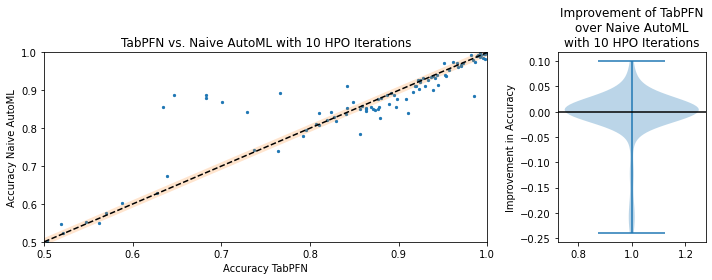

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]})
ax = axs[0]
ax.scatter(comparisons[:,0], comparisons[:,1], s=5)
ax.plot([0.5, 1], [0.5, 1], linestyle="--", color="black")
ax.fill_between([0, 1], [- 0.01, 0.99], [0.01, 1.01], alpha=0.2)
ax.set_xlim([0.5, 1.0])
ax.set_ylim([0.5, 1.0])
ax.set_xlabel("Accuracy TabPFN")
ax.set_ylabel("Accuracy Naive AutoML")
ax.set_title("TabPFN vs. Naive AutoML with 10 HPO Iterations")

mask = ~(np.isnan(comparisons[:,0]) | np.isnan(comparisons[:,1]))
ax = axs[1]
ax.violinplot(comparisons[mask,0] - comparisons[mask,1])
ax.axhline(0, color="black")
ax.set_title("Improvement of TabPFN\nover Naive AutoML\nwith 10 HPO Iterations")
ax.set_ylabel("Improvement in Accuracy")
fig.tight_layout()

  0%|          | 0/102 [00:00<?, ?it/s]

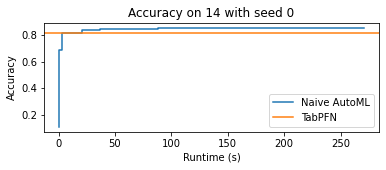

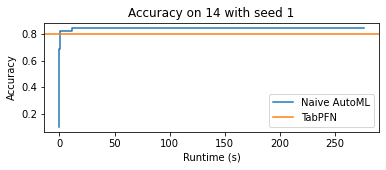

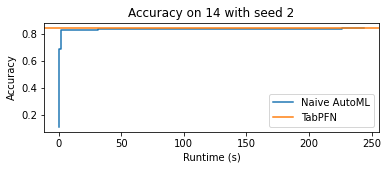

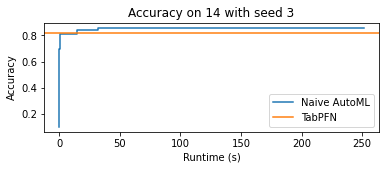

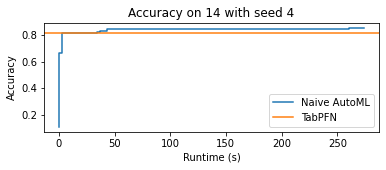

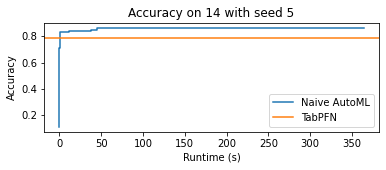

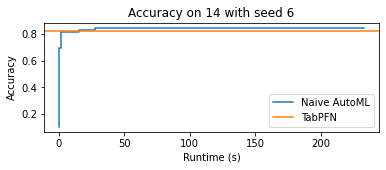

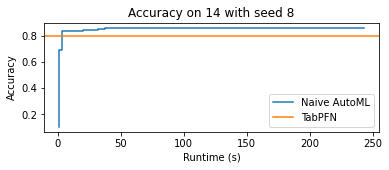

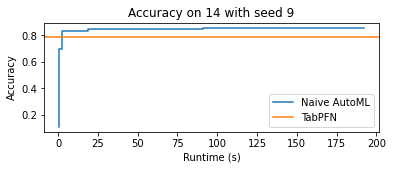

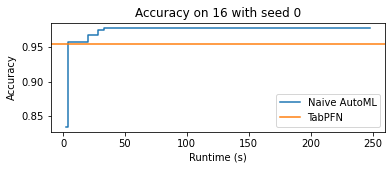

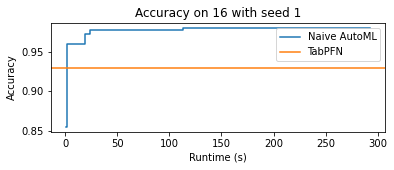

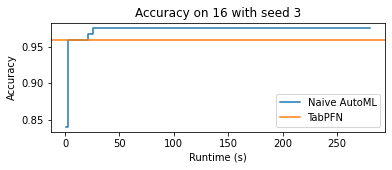

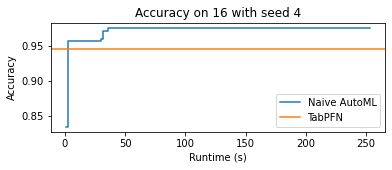

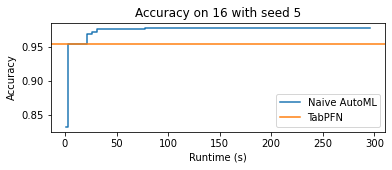

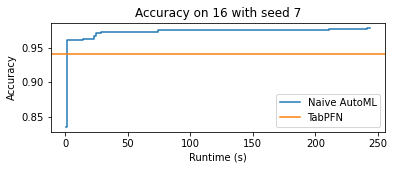

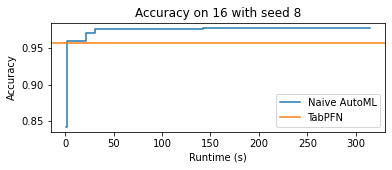

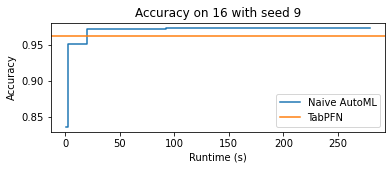

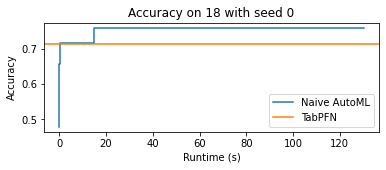

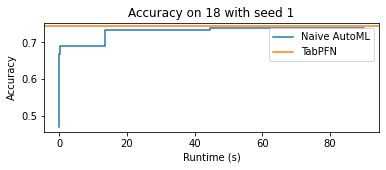

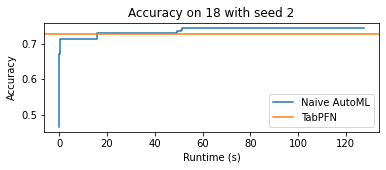

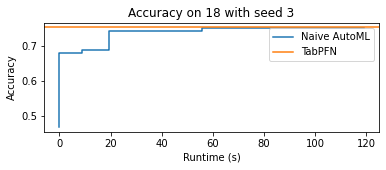

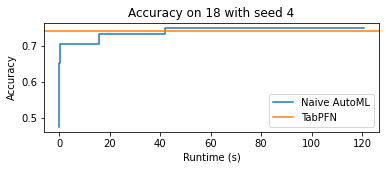

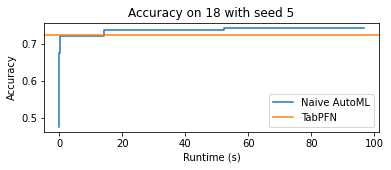

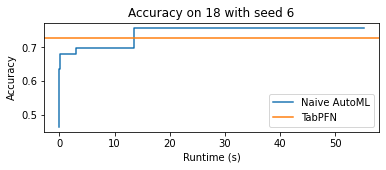

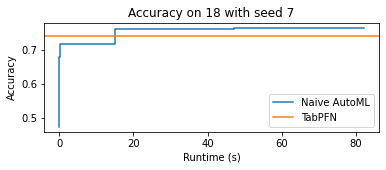

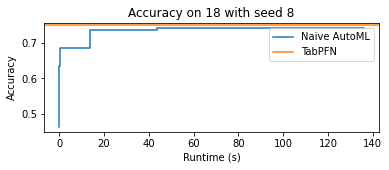

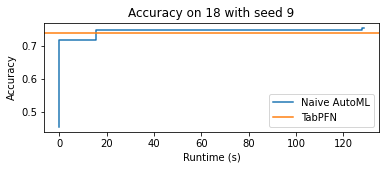

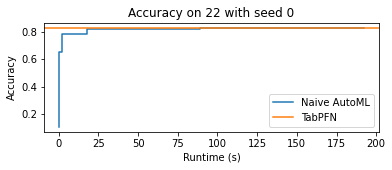

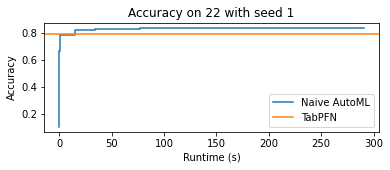

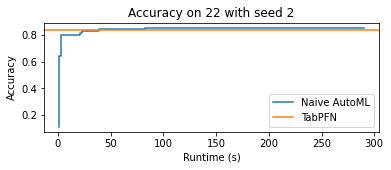

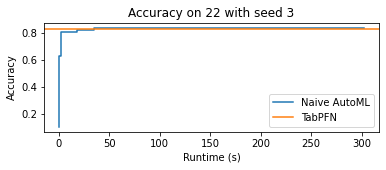

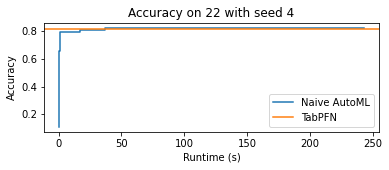

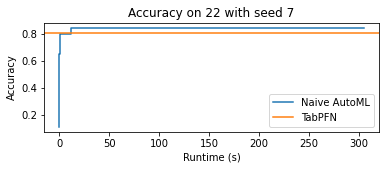

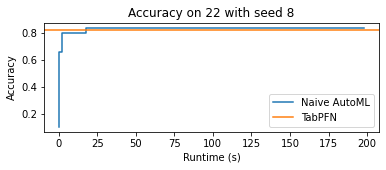

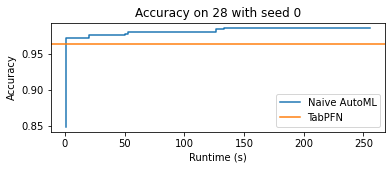

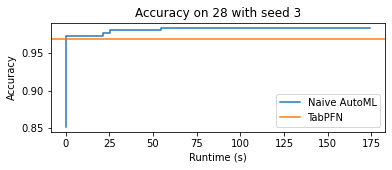

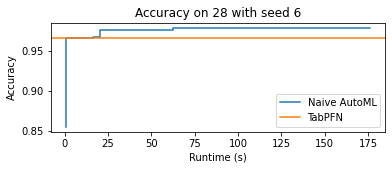

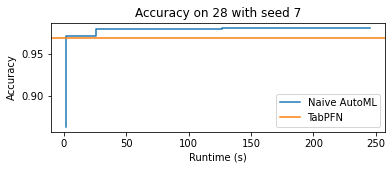

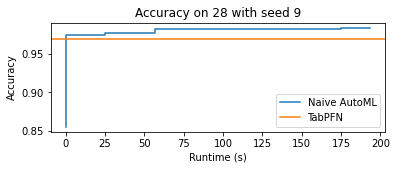

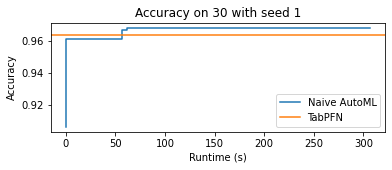

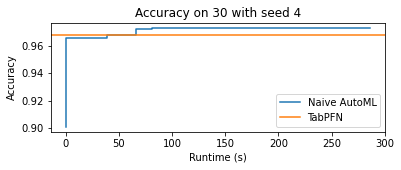

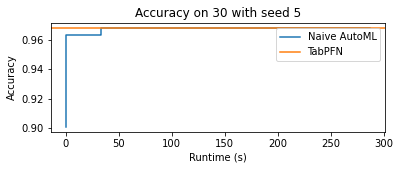

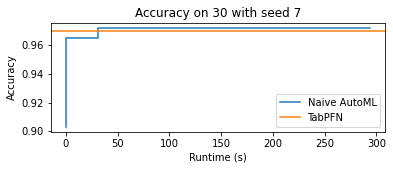

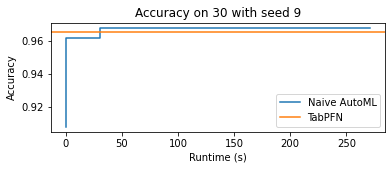

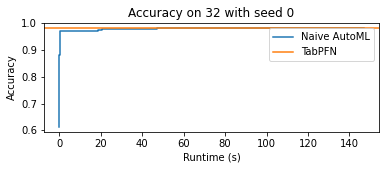

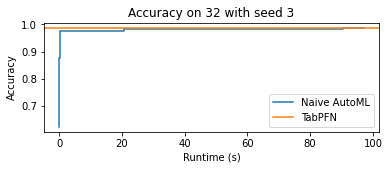

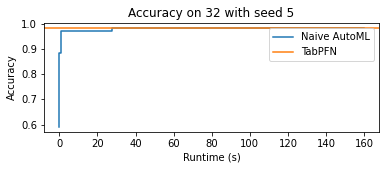

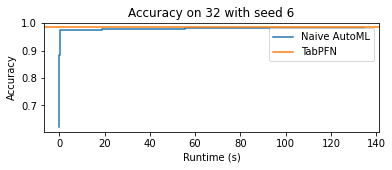

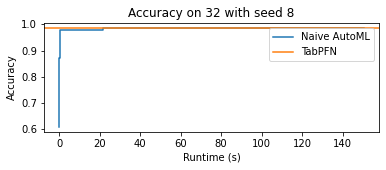

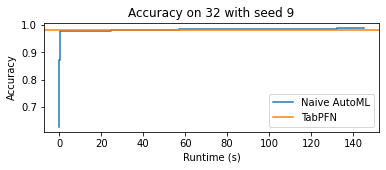

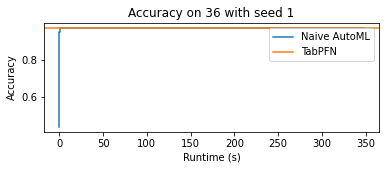

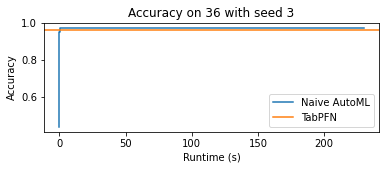

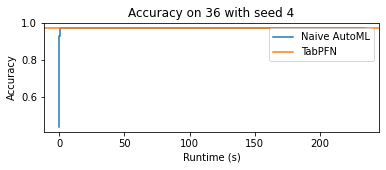

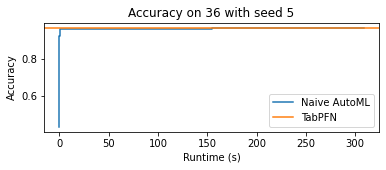

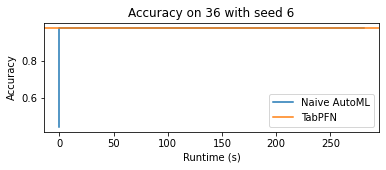

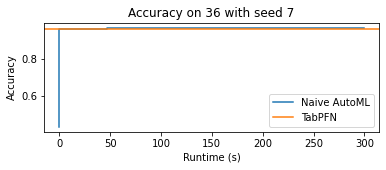

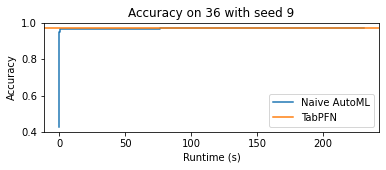

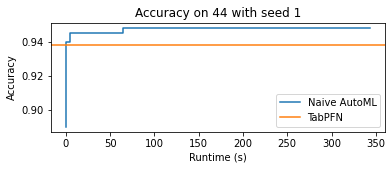

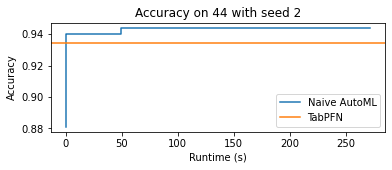

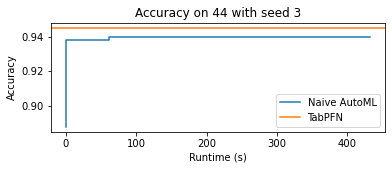

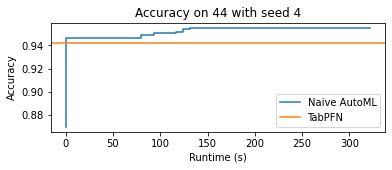

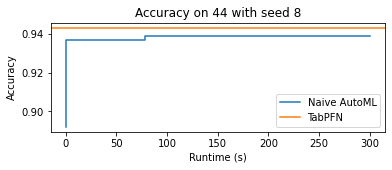

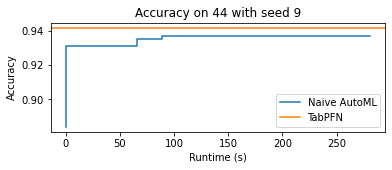

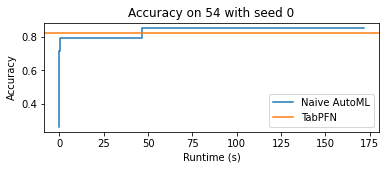

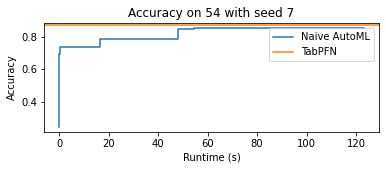

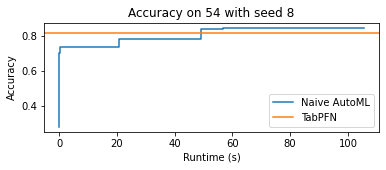

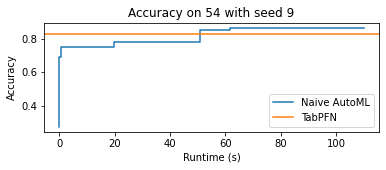

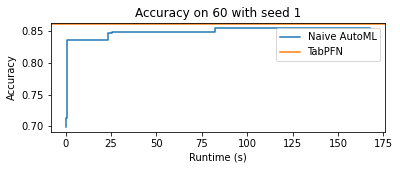

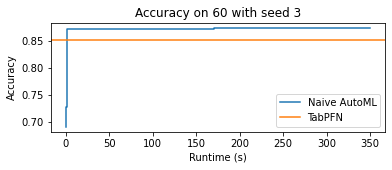

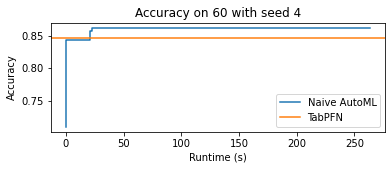

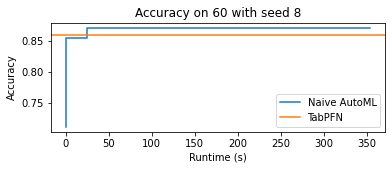

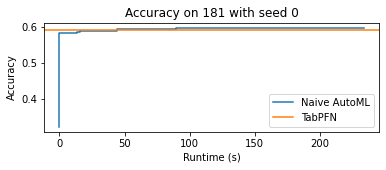

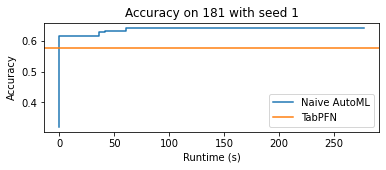

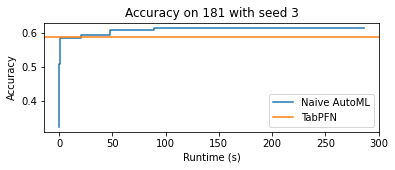

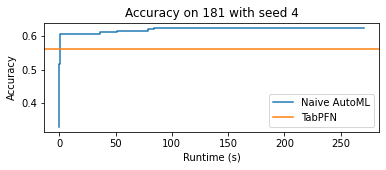

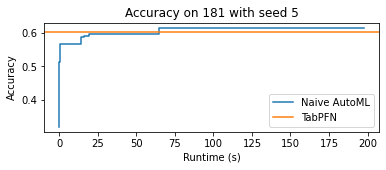

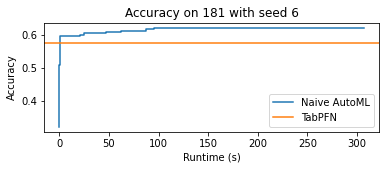

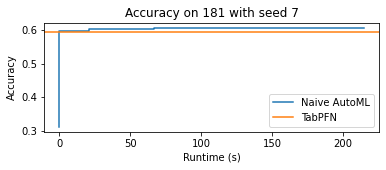

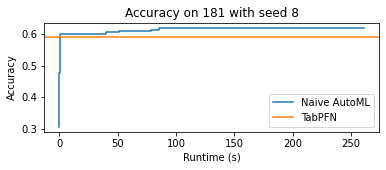

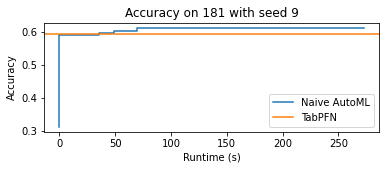

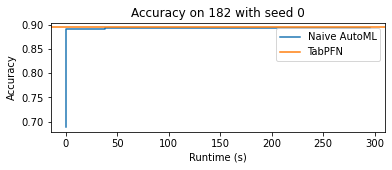

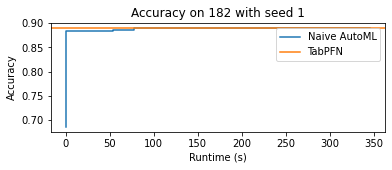

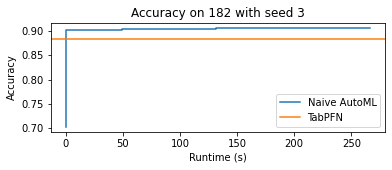

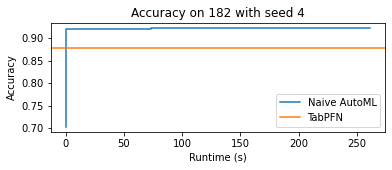

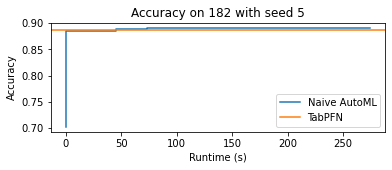

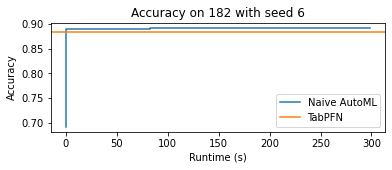

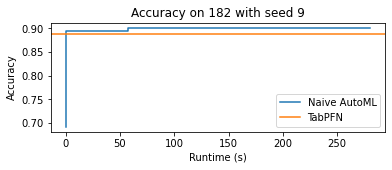

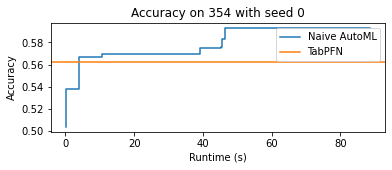

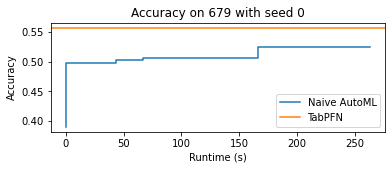

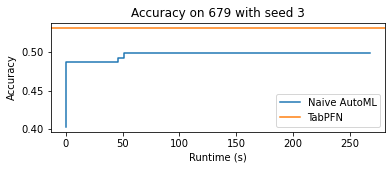

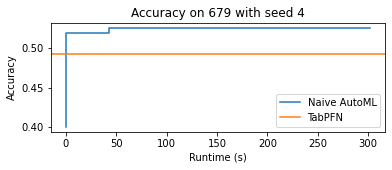

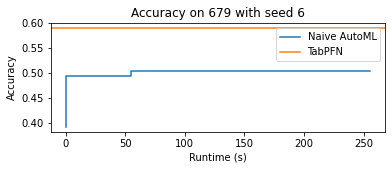

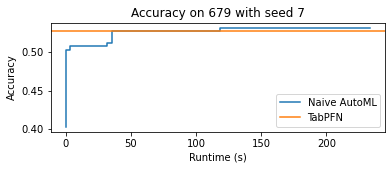

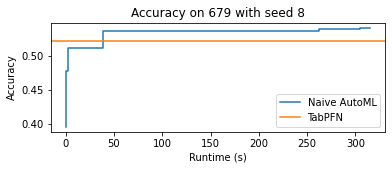

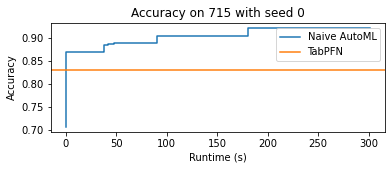

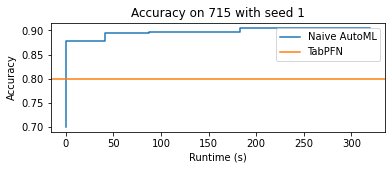

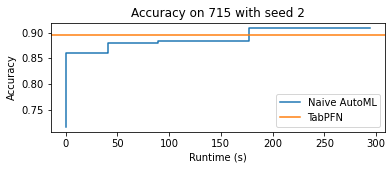

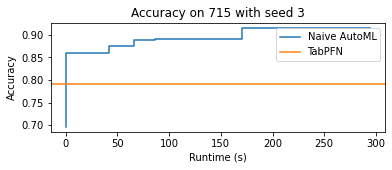

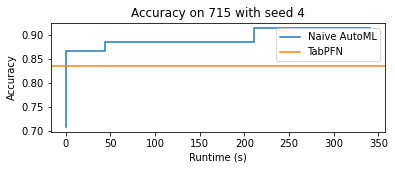

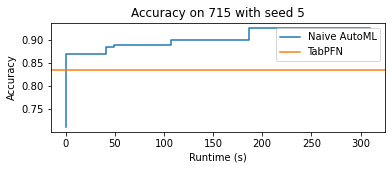

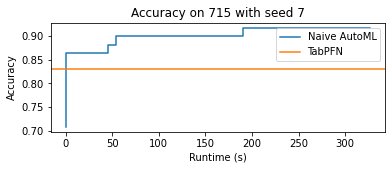

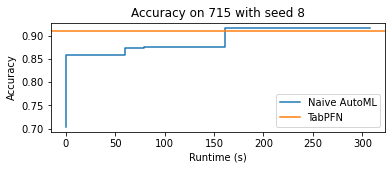

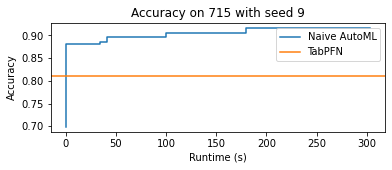

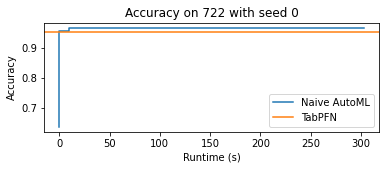

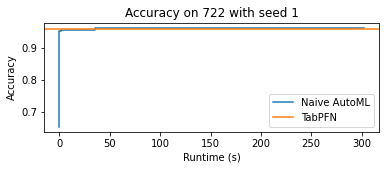

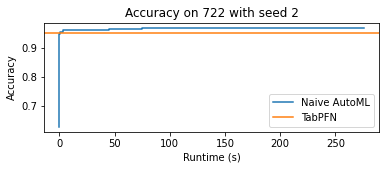

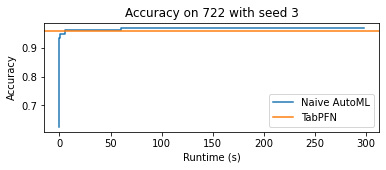

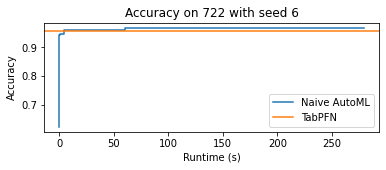

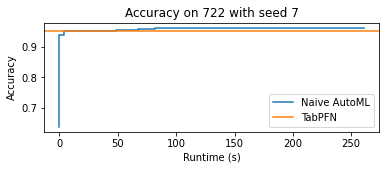

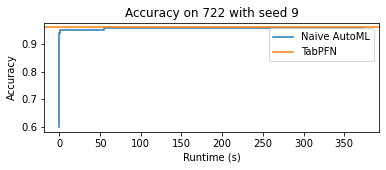

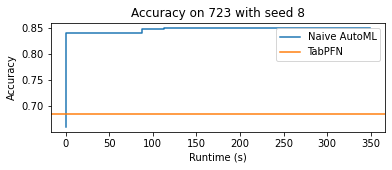

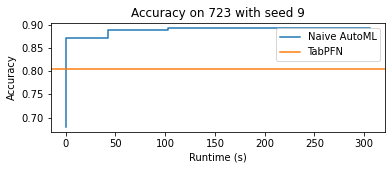

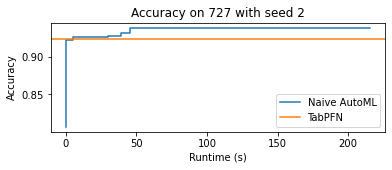

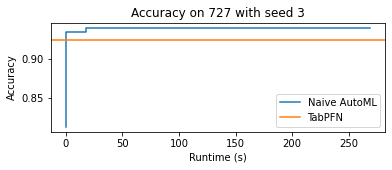

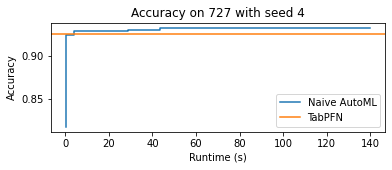

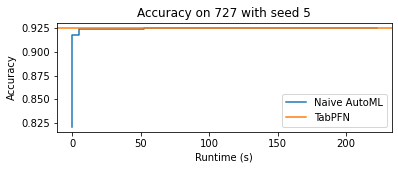

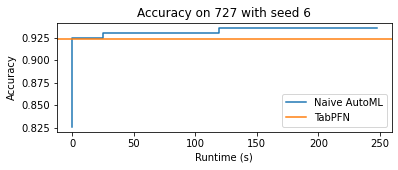

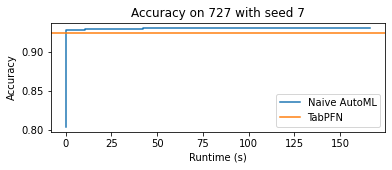

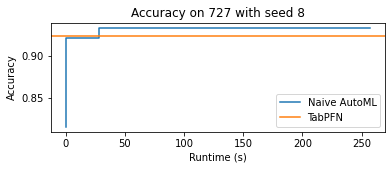

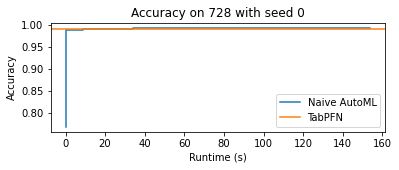

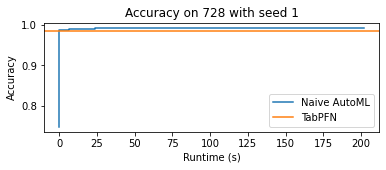

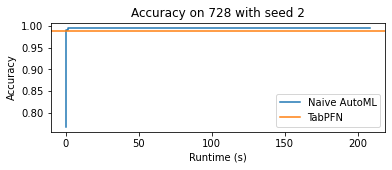

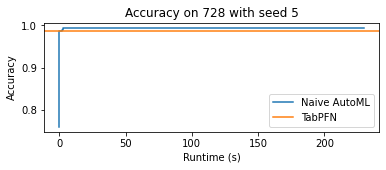

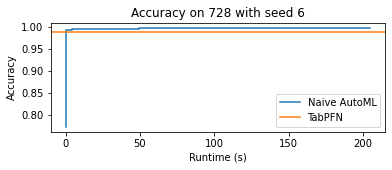

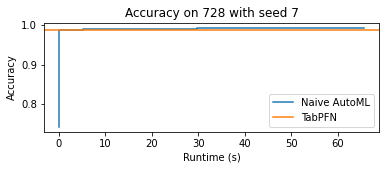

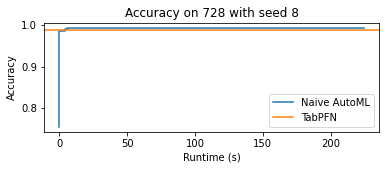

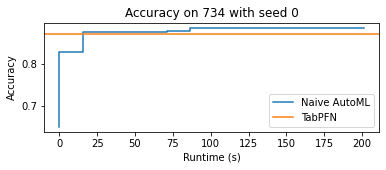

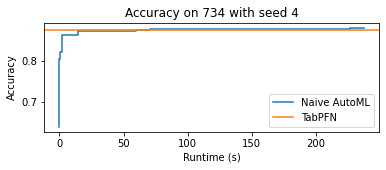

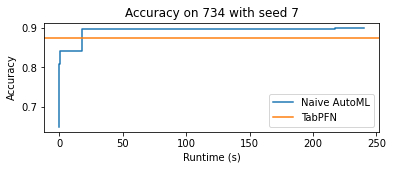

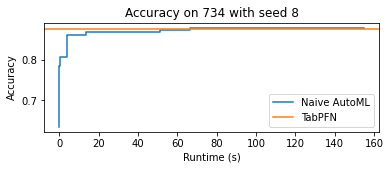

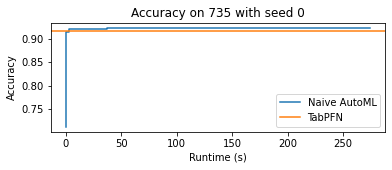

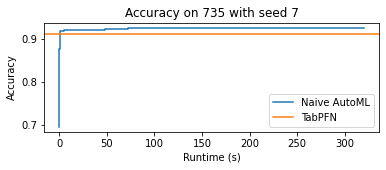

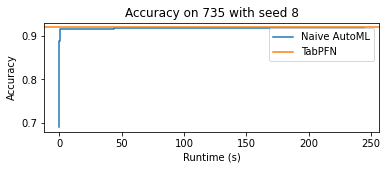

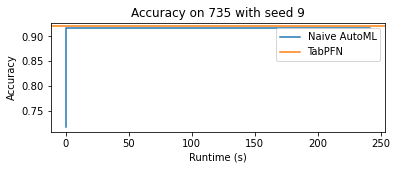

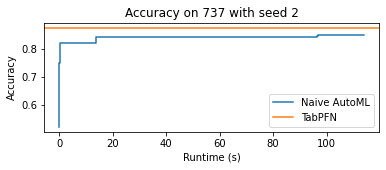

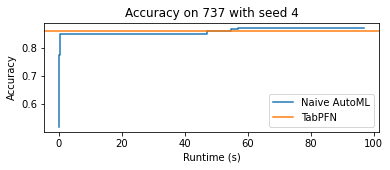

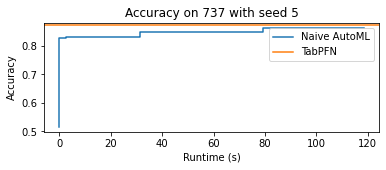

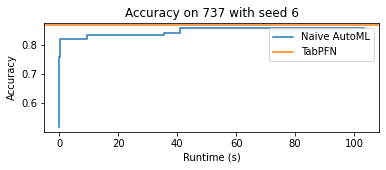

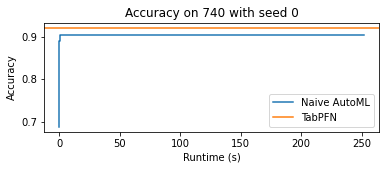

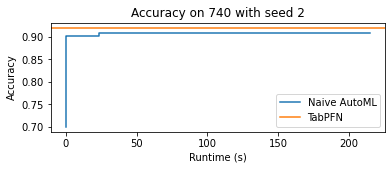

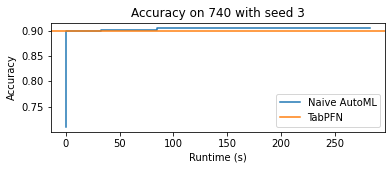

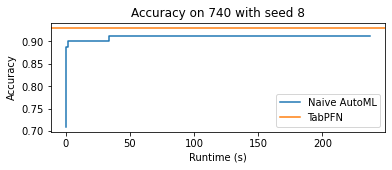

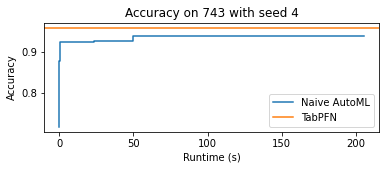

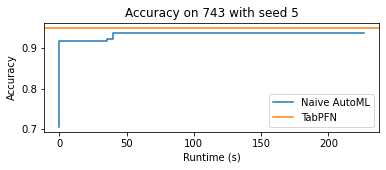

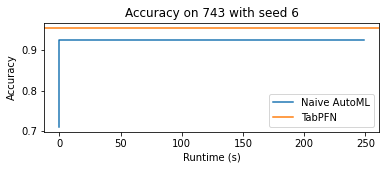

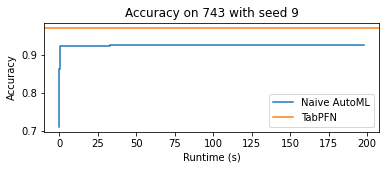

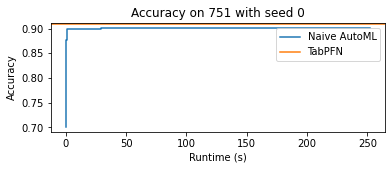

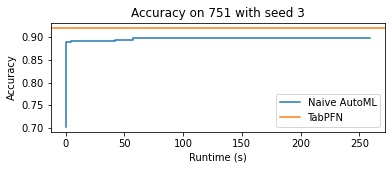

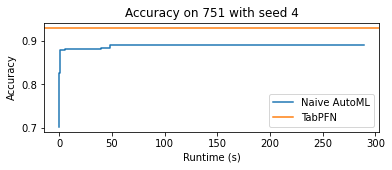

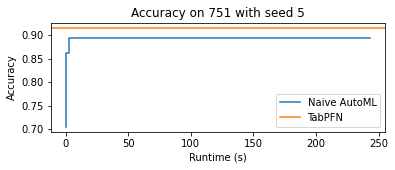

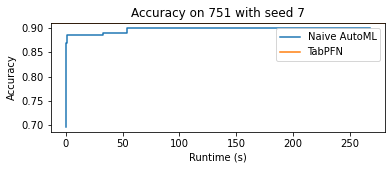

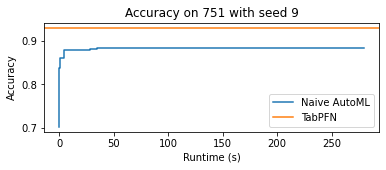

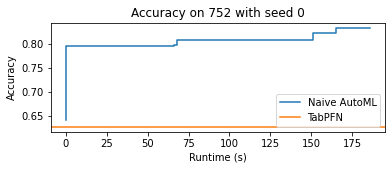

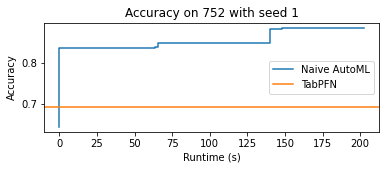

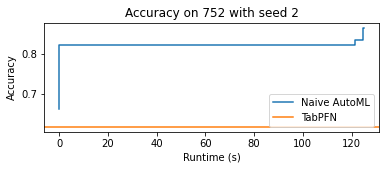

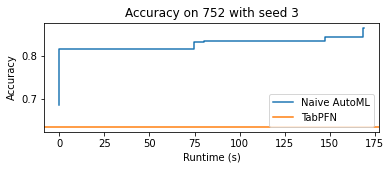

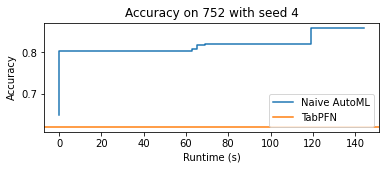

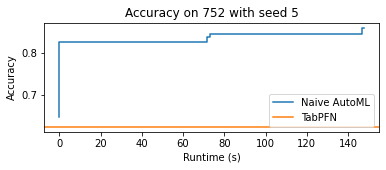

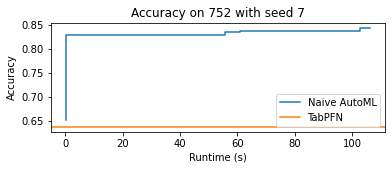

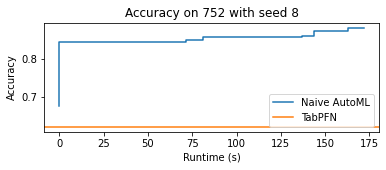

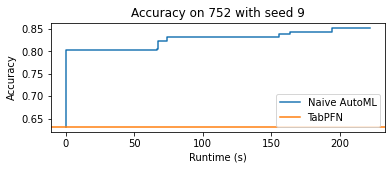

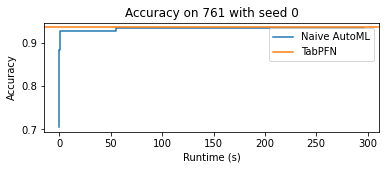

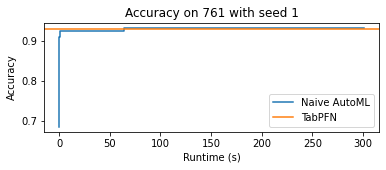

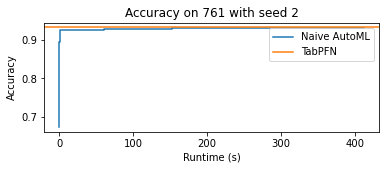

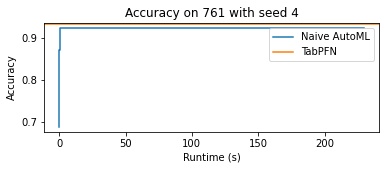

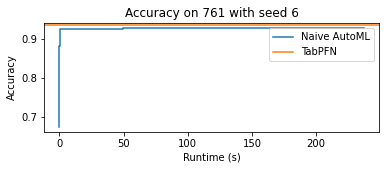

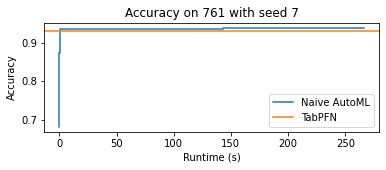

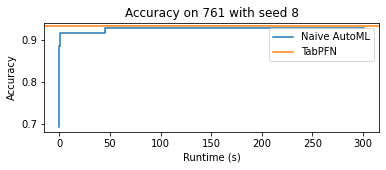

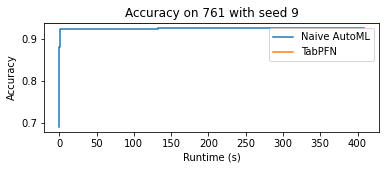

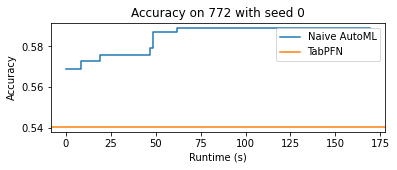

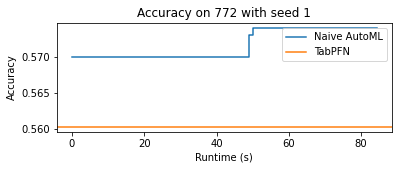

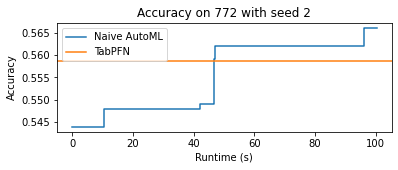

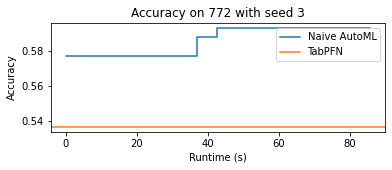

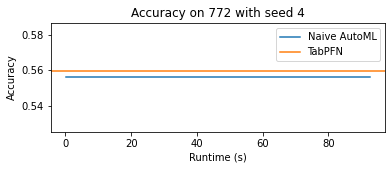

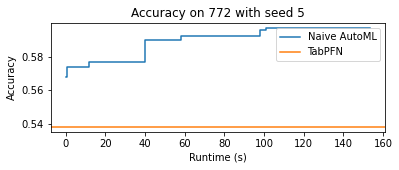

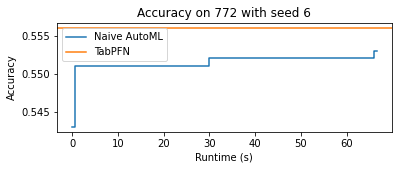

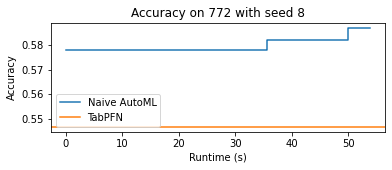

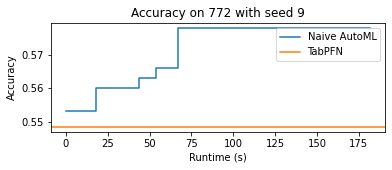

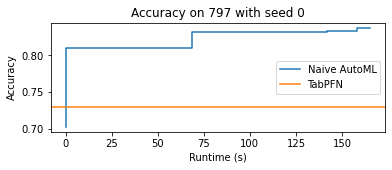

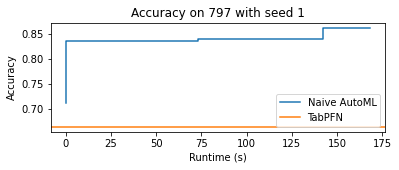

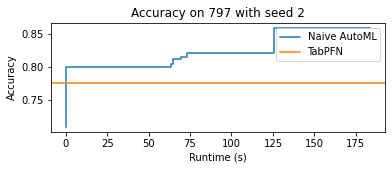

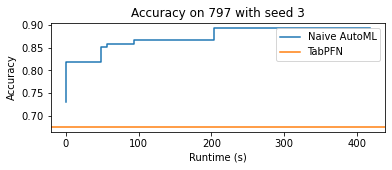

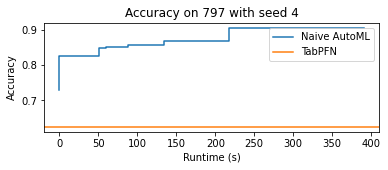

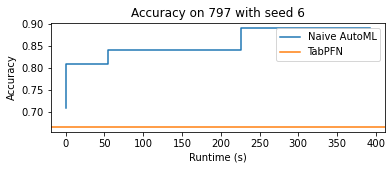

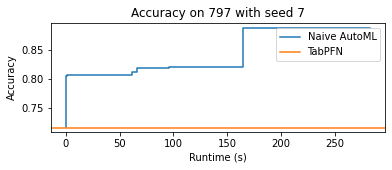

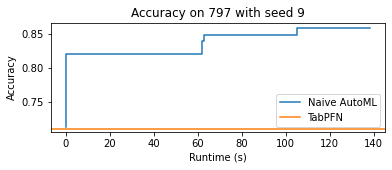

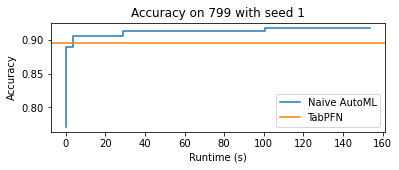

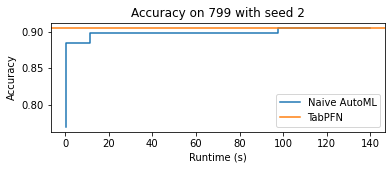

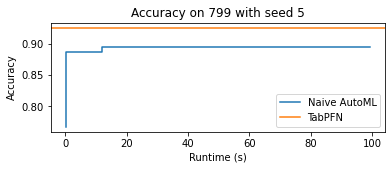

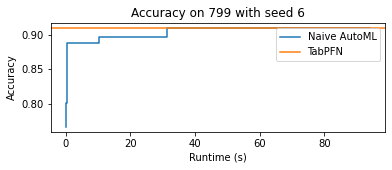

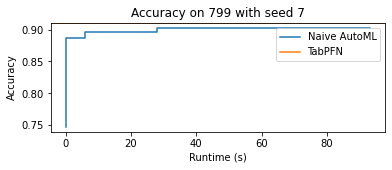

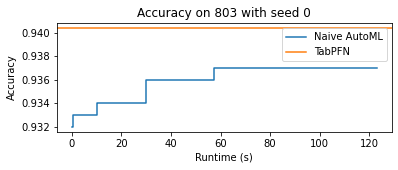

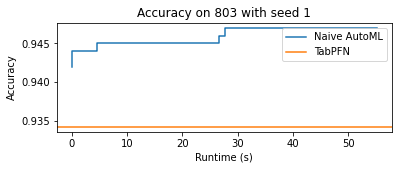

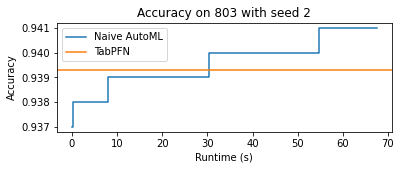

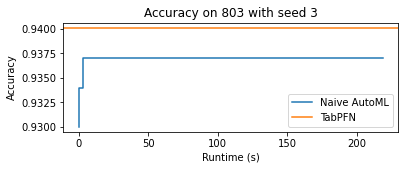

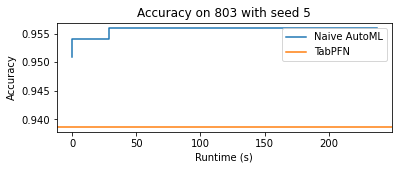

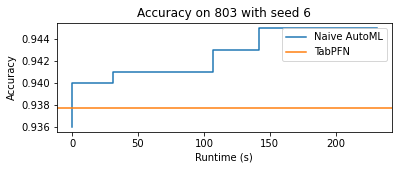

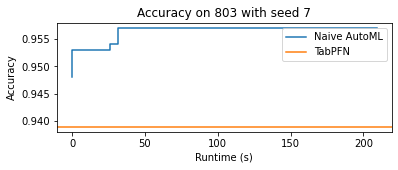

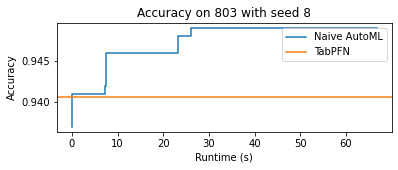

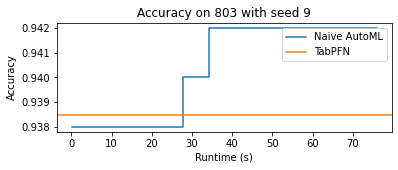

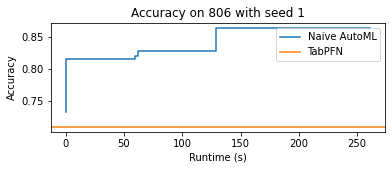

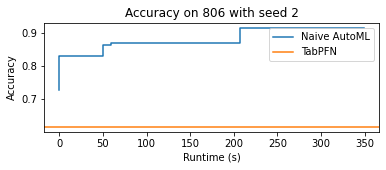

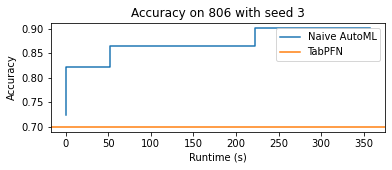

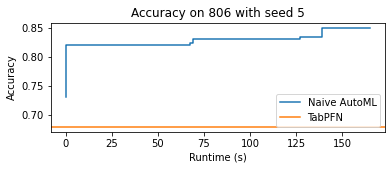

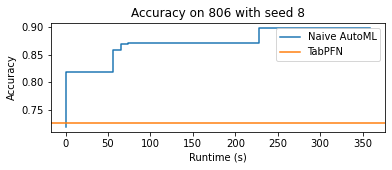

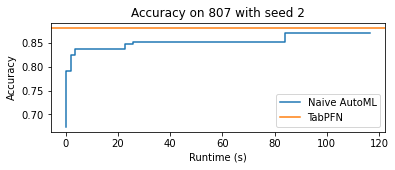

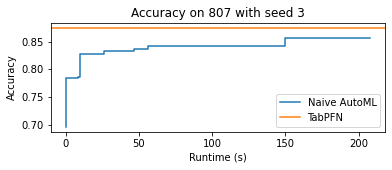

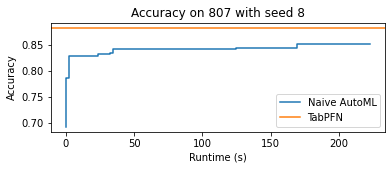

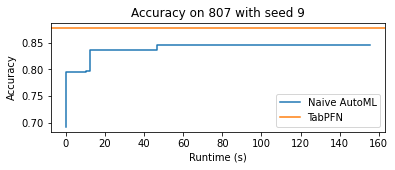

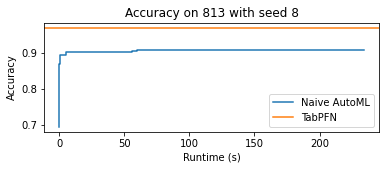

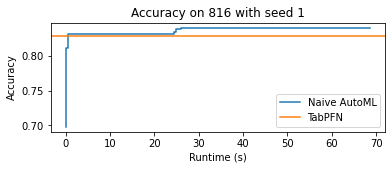

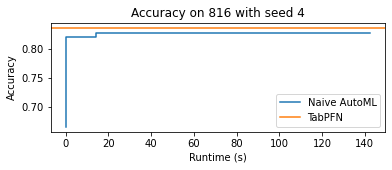

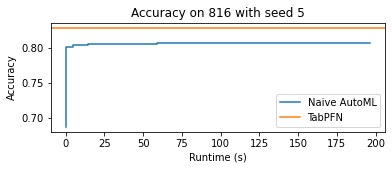

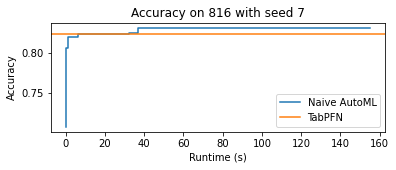

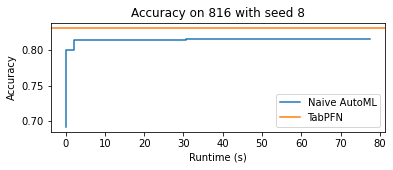

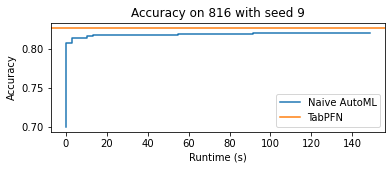

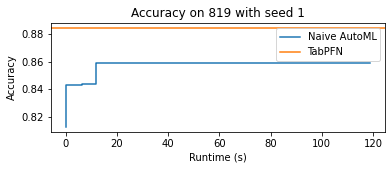

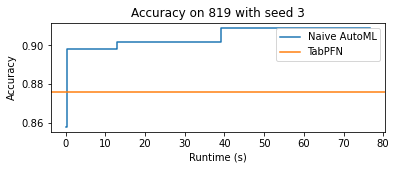

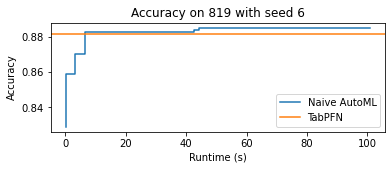

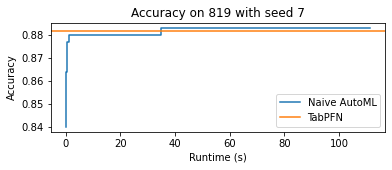

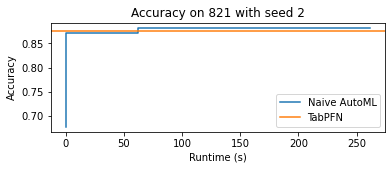

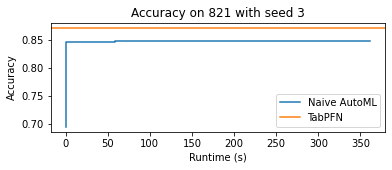

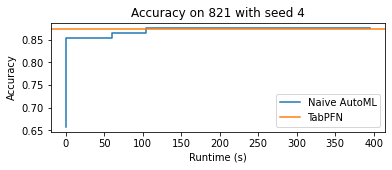

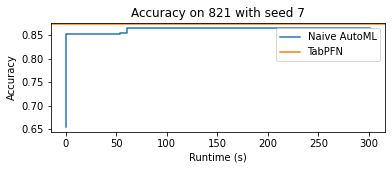

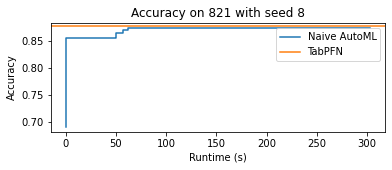

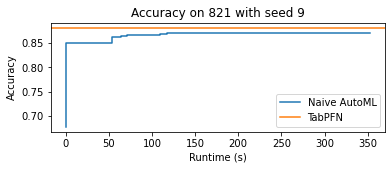

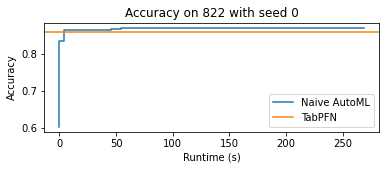

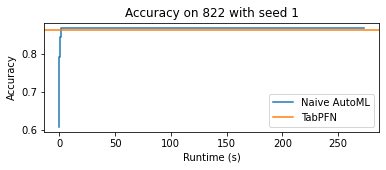

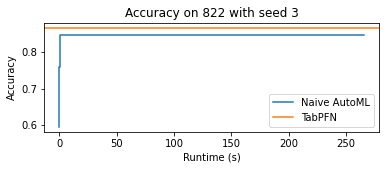

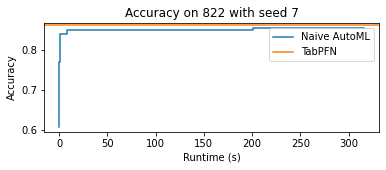

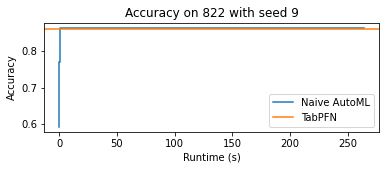

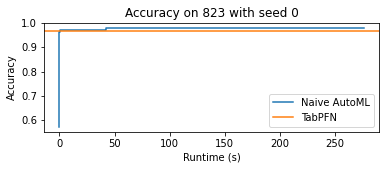

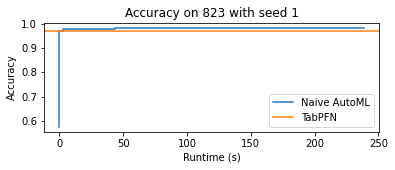

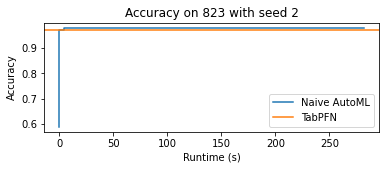

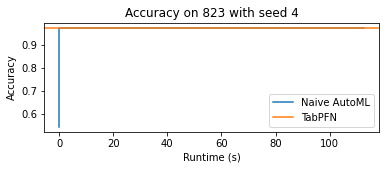

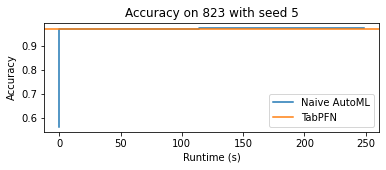

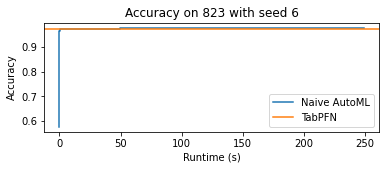

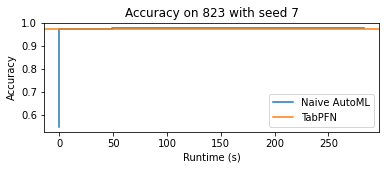

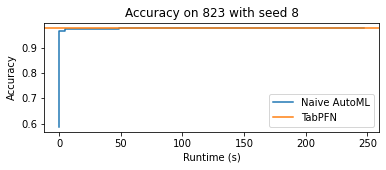

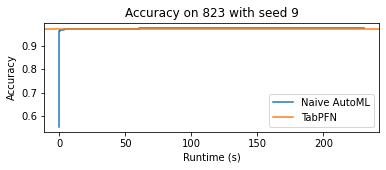

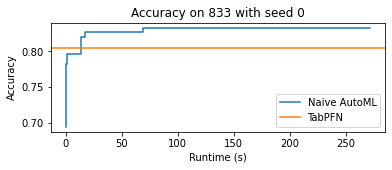

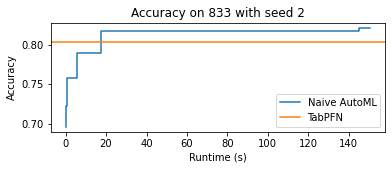

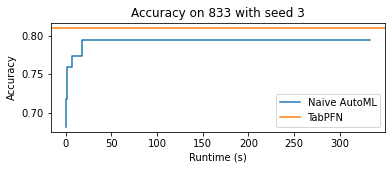

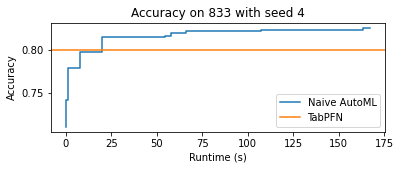

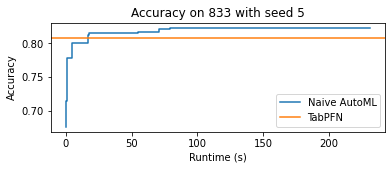

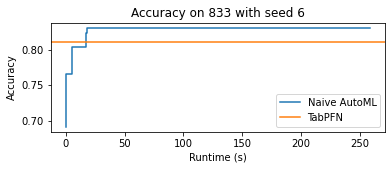

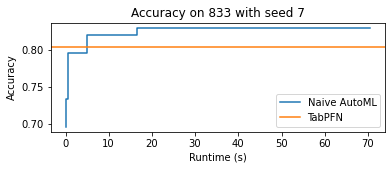

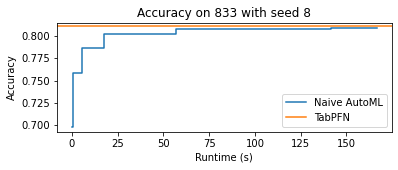

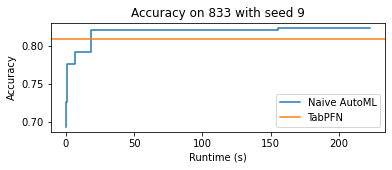

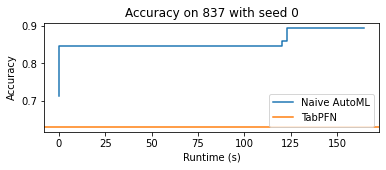

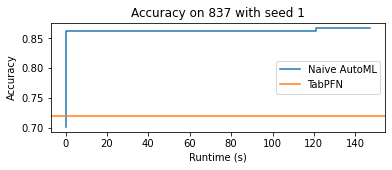

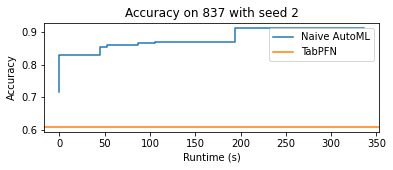

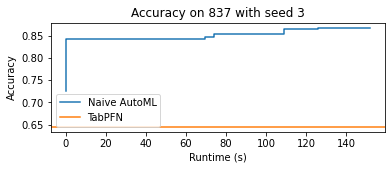

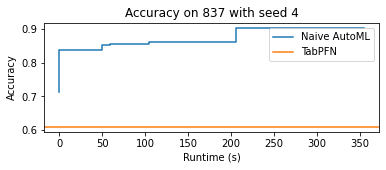

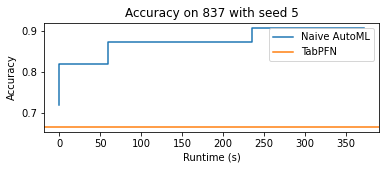

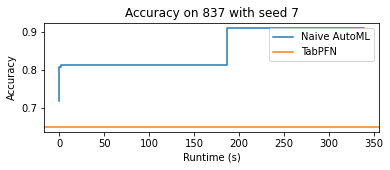

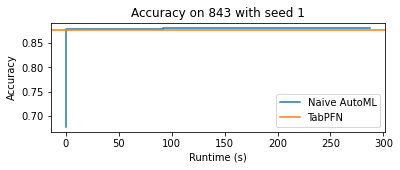

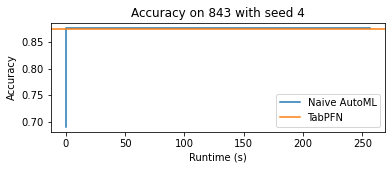

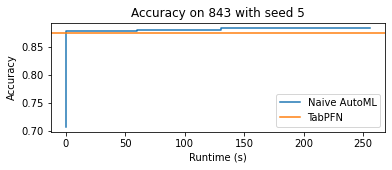

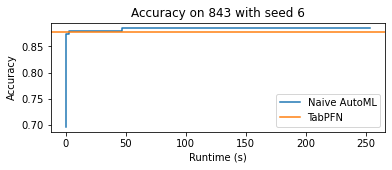

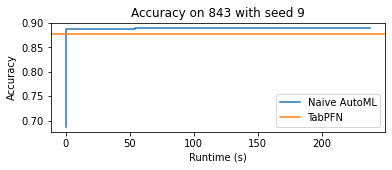

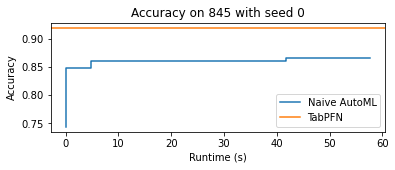

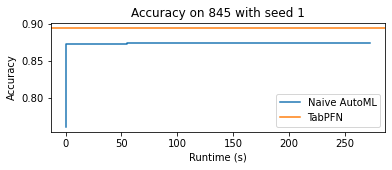

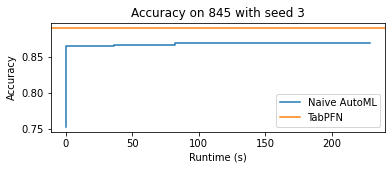

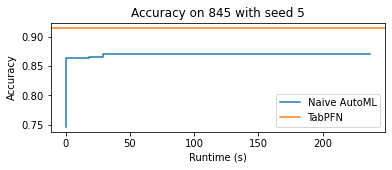

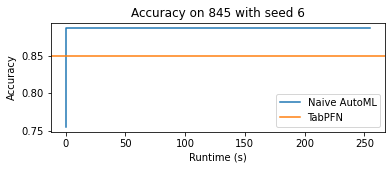

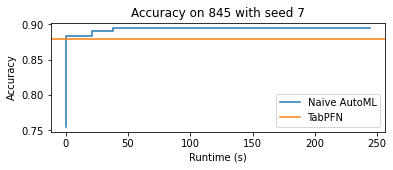

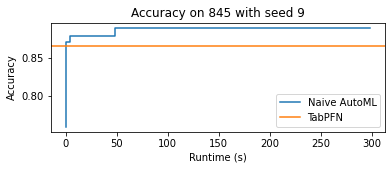

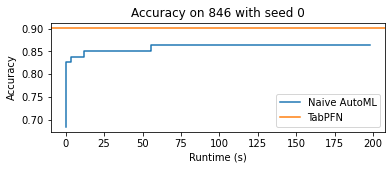

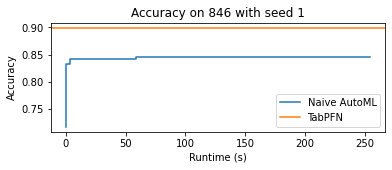

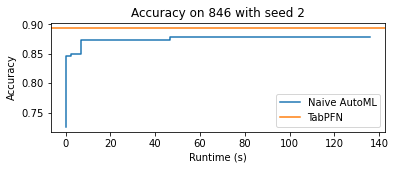

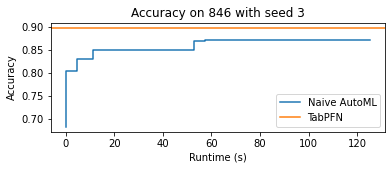

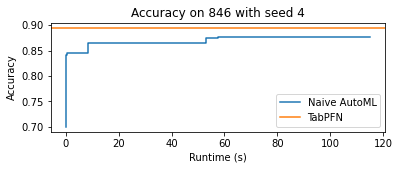

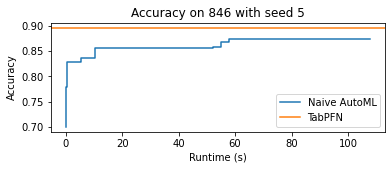

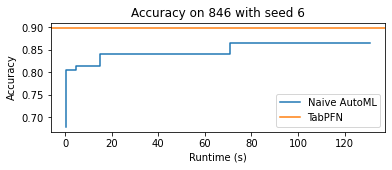

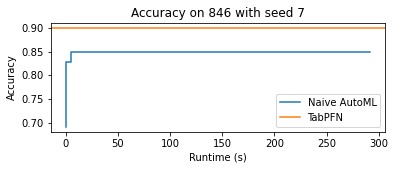

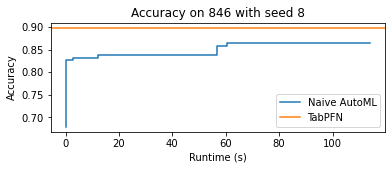

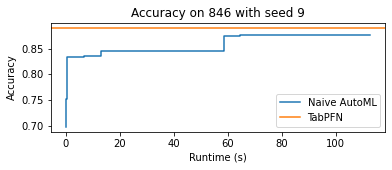

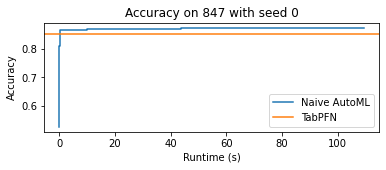

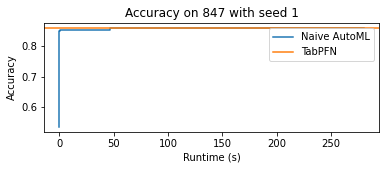

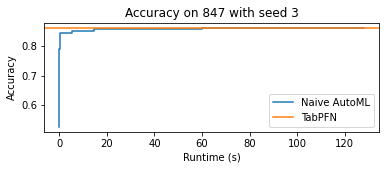

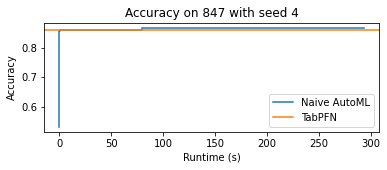

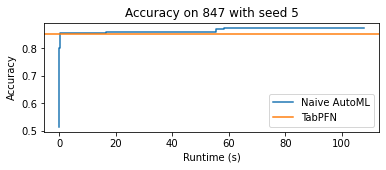

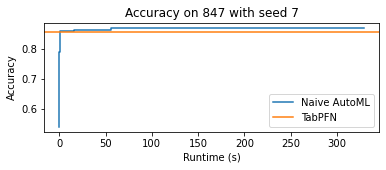

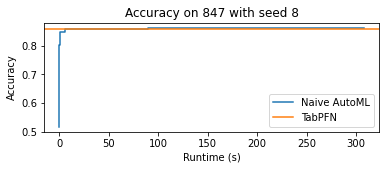

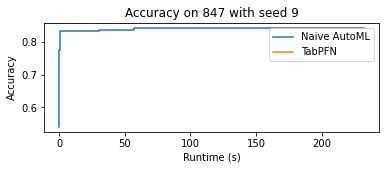

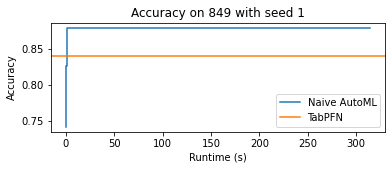

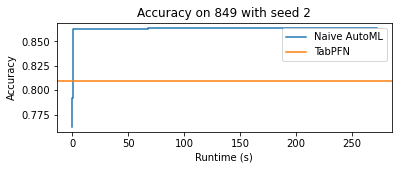

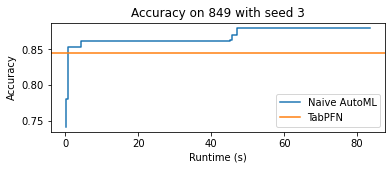

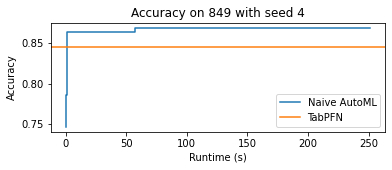

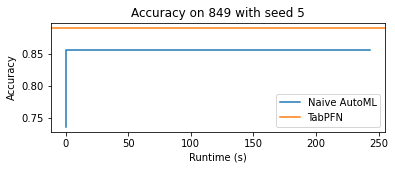

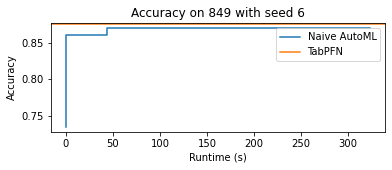

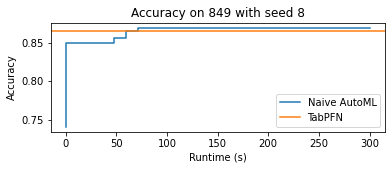

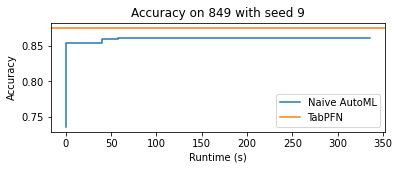

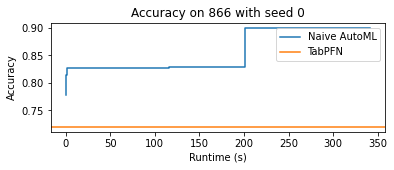

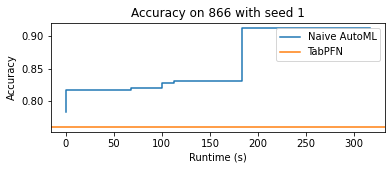

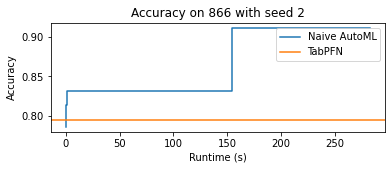

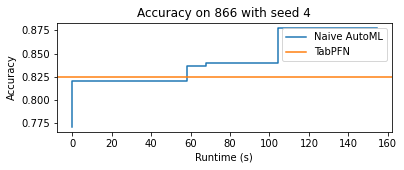

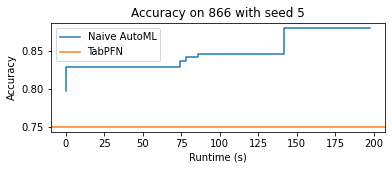

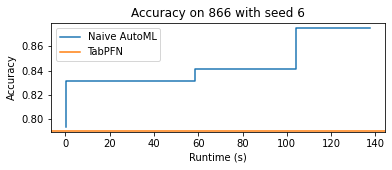

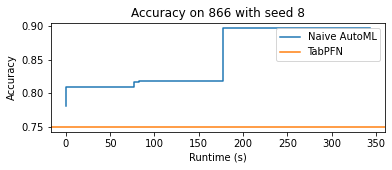

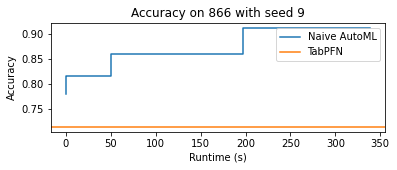

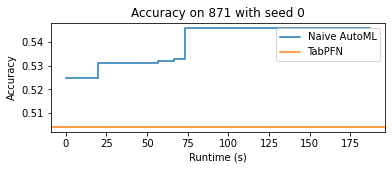

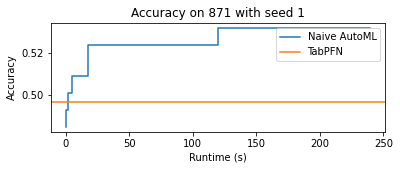

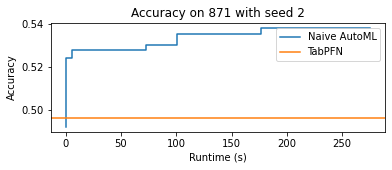

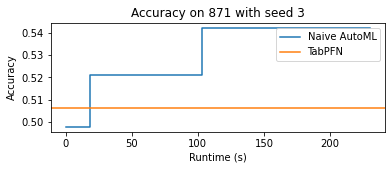

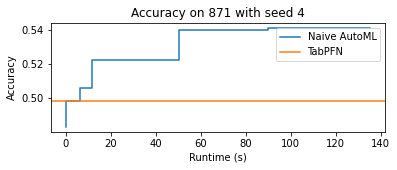

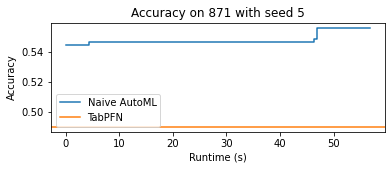

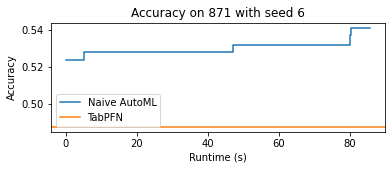

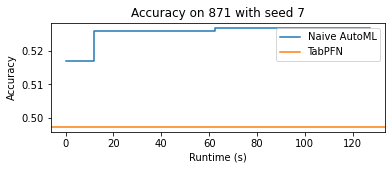

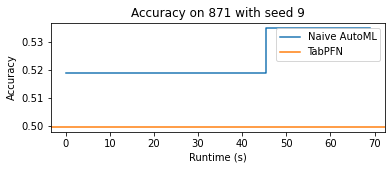

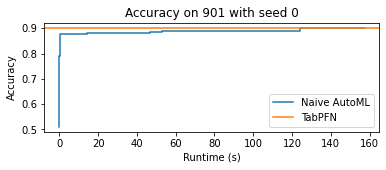

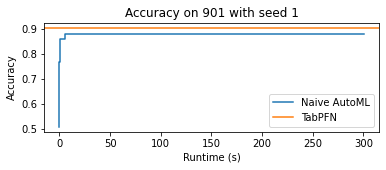

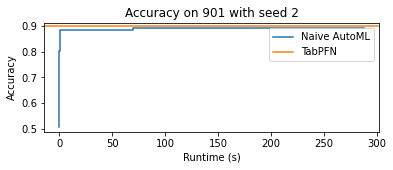

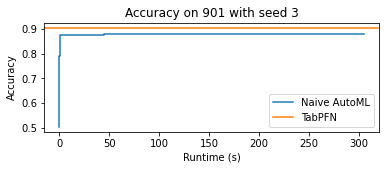

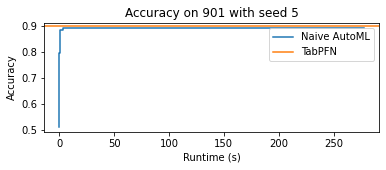

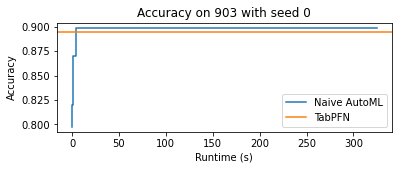

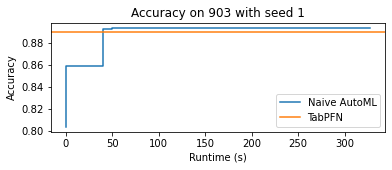

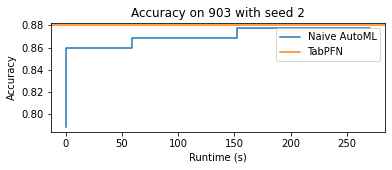

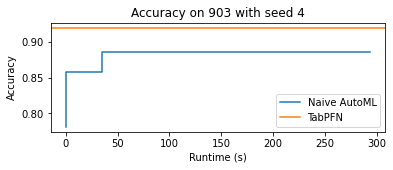

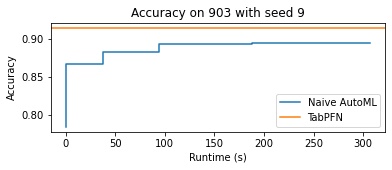

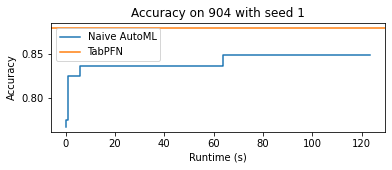

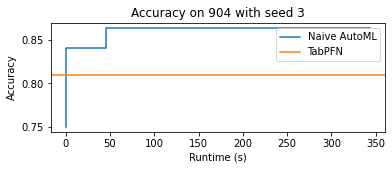

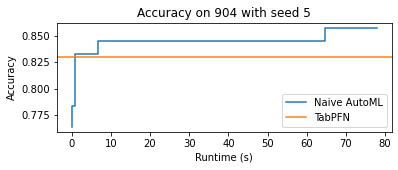

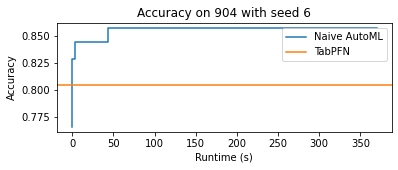

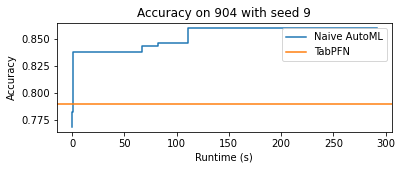

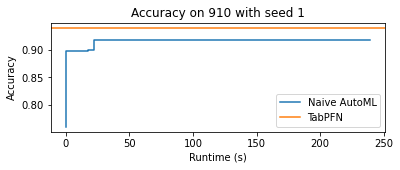

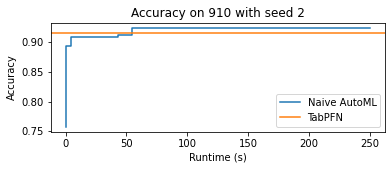

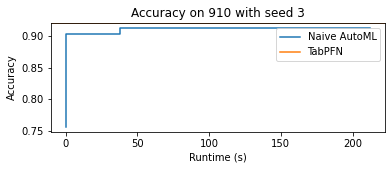

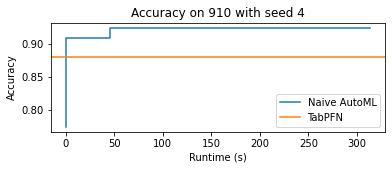

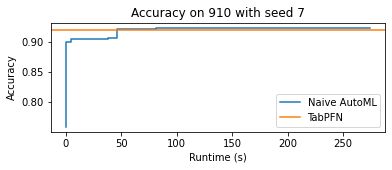

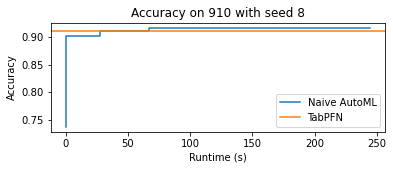

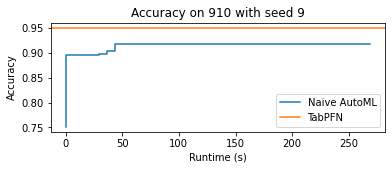

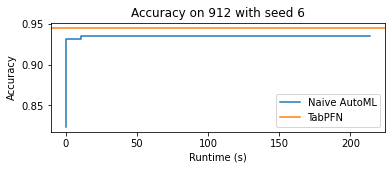

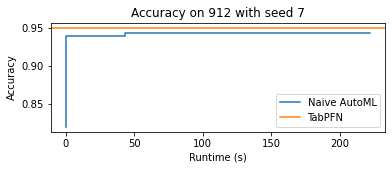

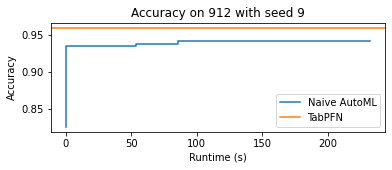

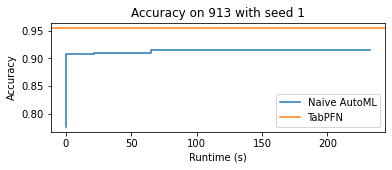

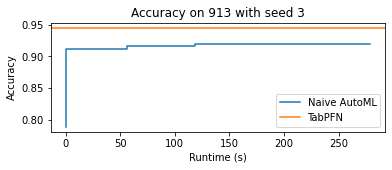

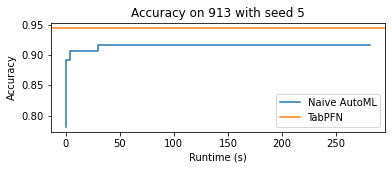

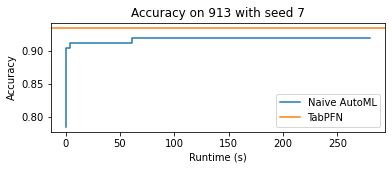

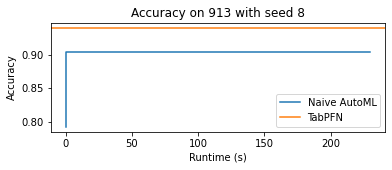

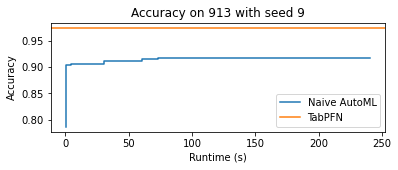

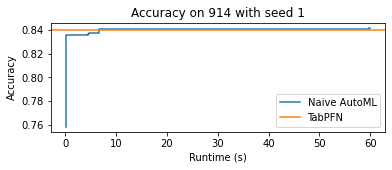

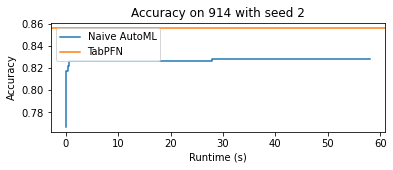

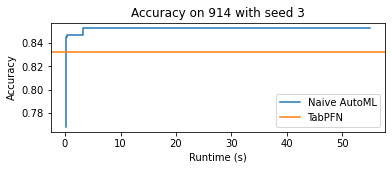

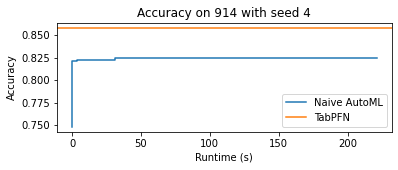

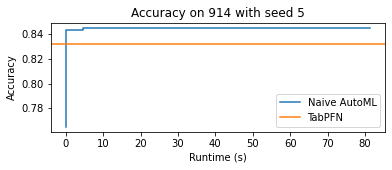

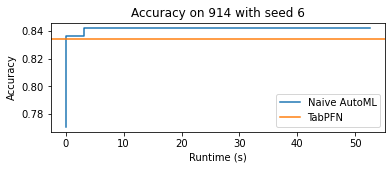

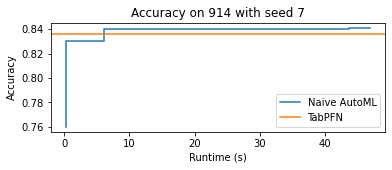

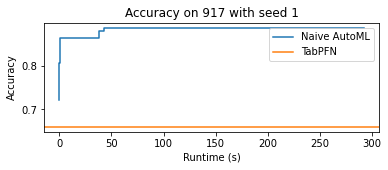

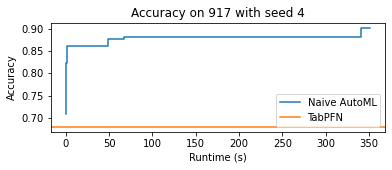

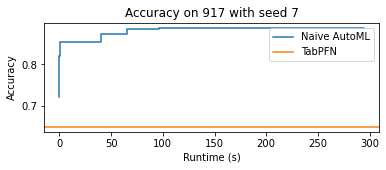

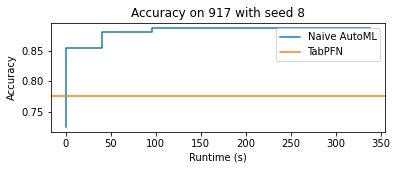

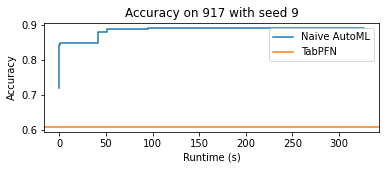

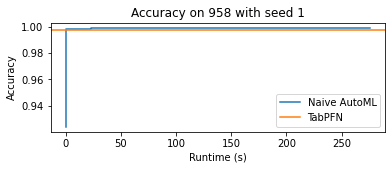

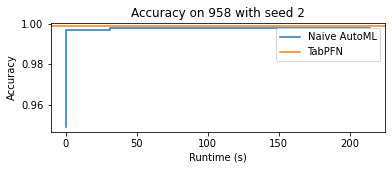

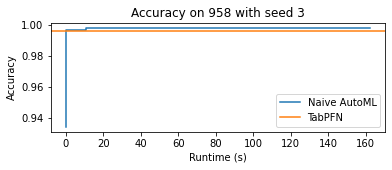

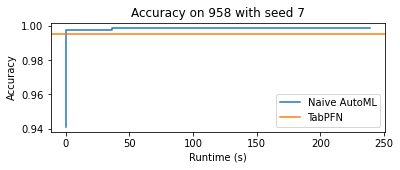

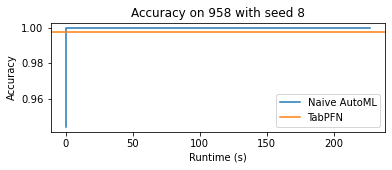

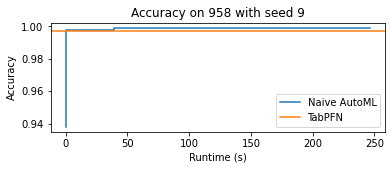

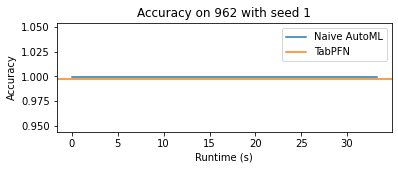

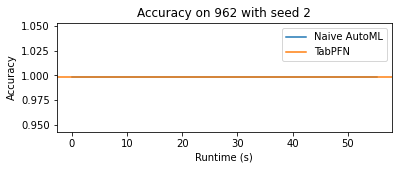

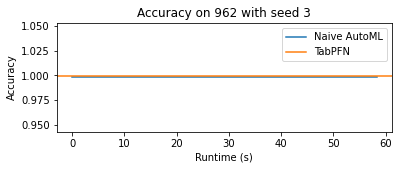

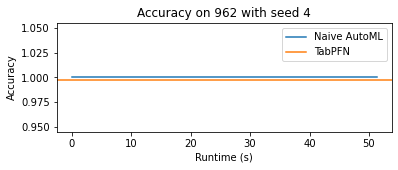

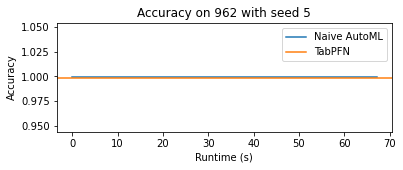

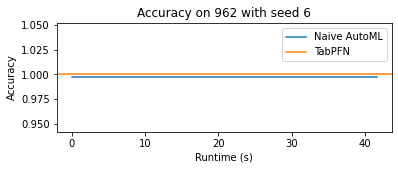

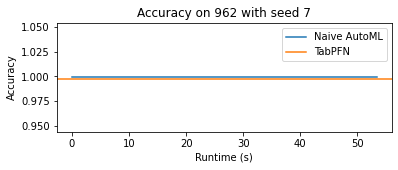

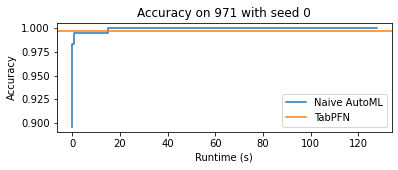

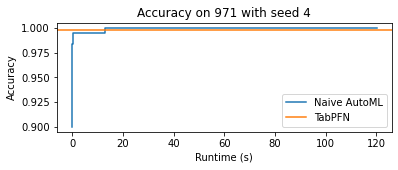

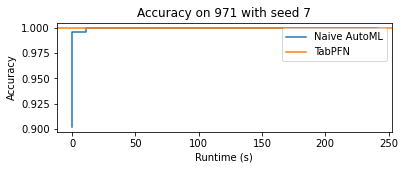

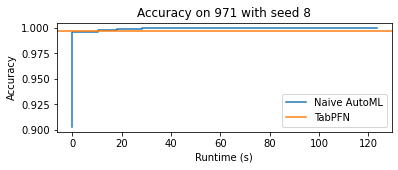

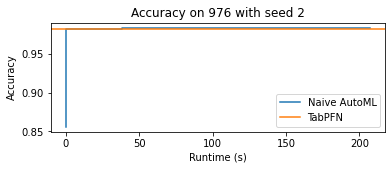

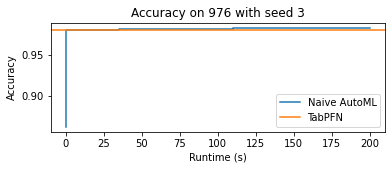

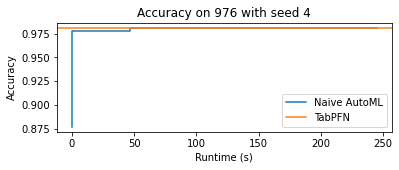

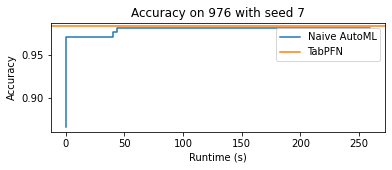

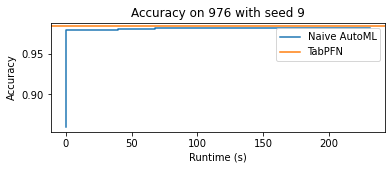

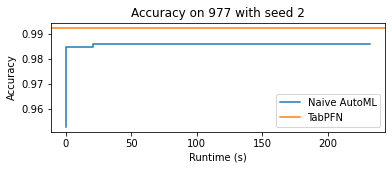

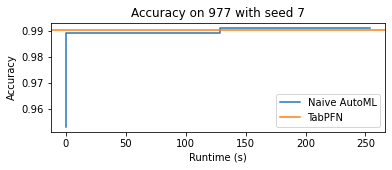

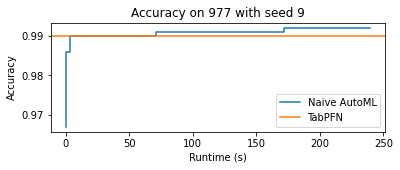

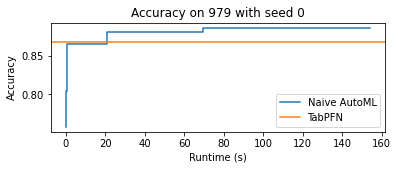

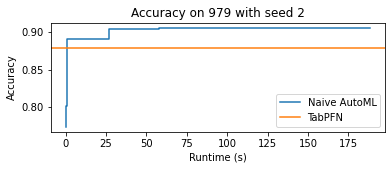

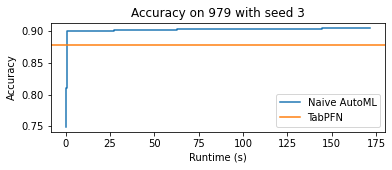

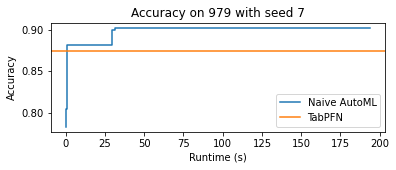

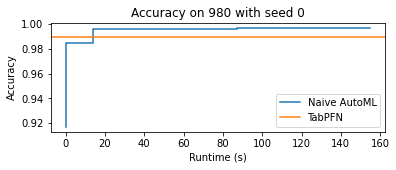

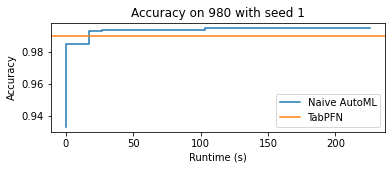

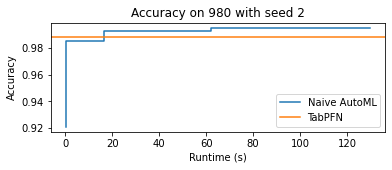

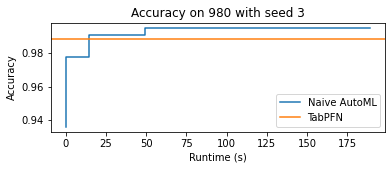

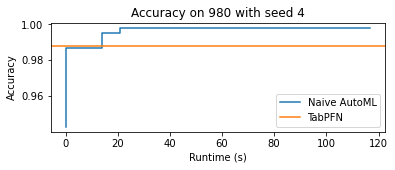

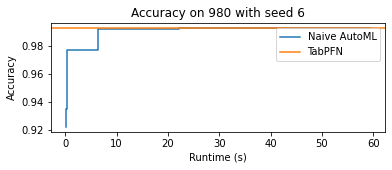

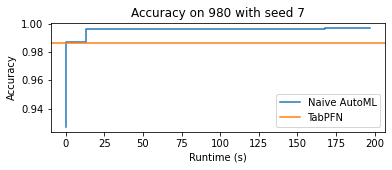

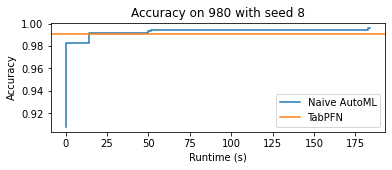

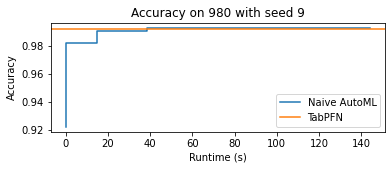

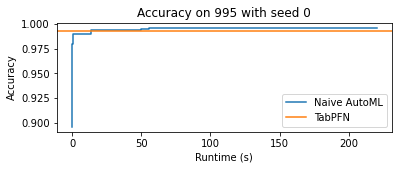

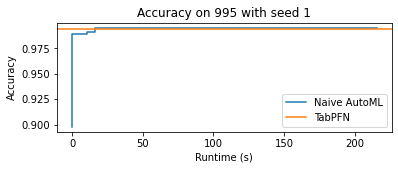

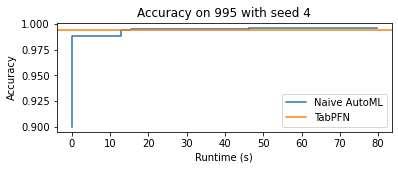

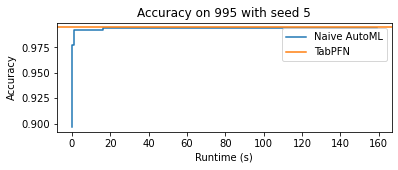

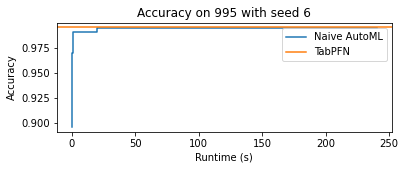

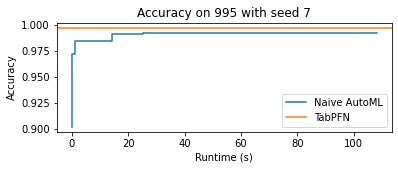

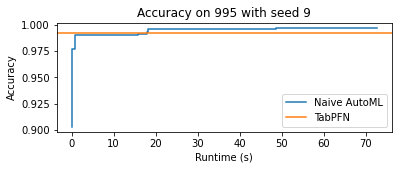

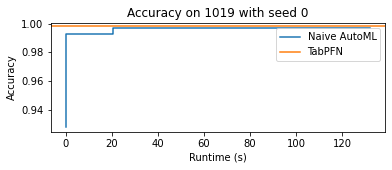

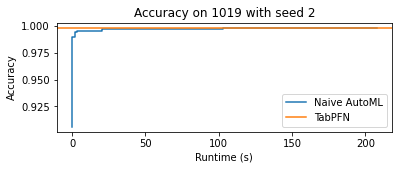

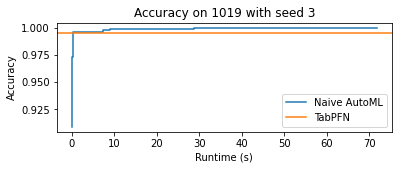

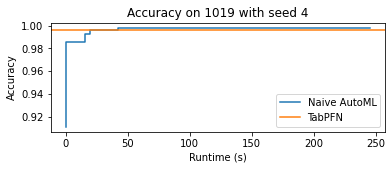

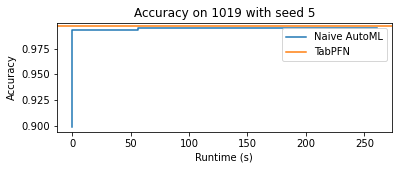

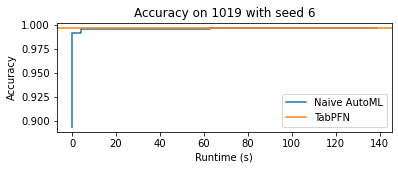

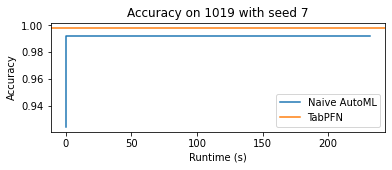

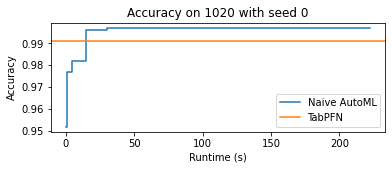

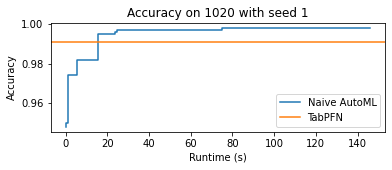

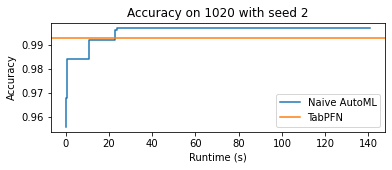

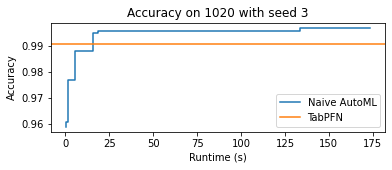

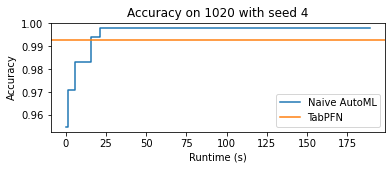

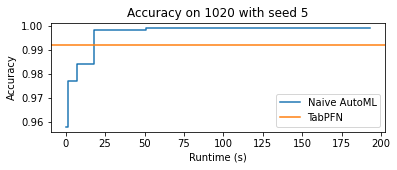

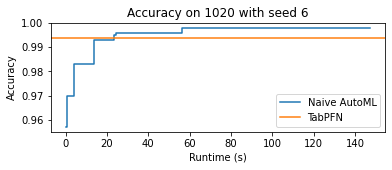

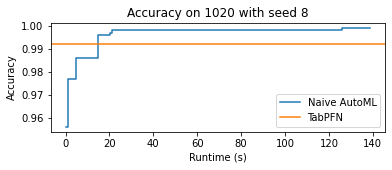

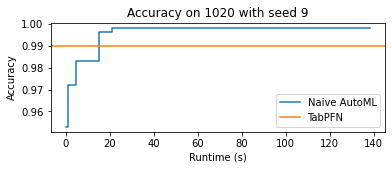

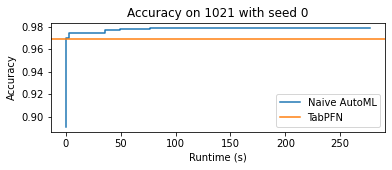

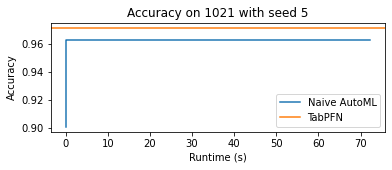

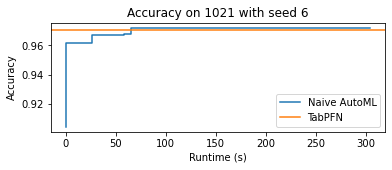

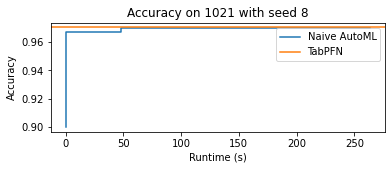

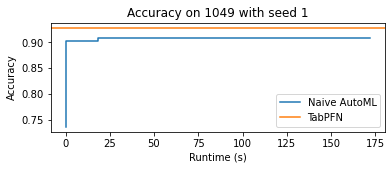

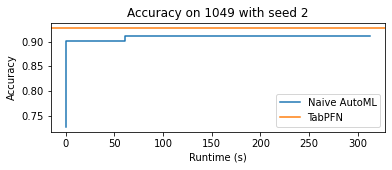

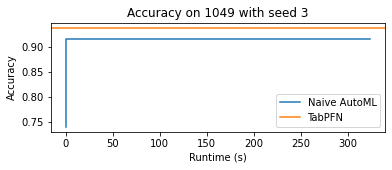

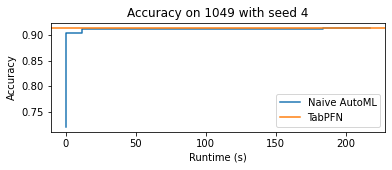

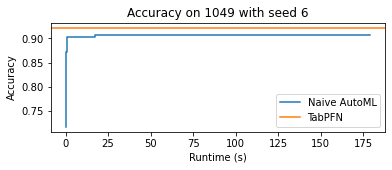

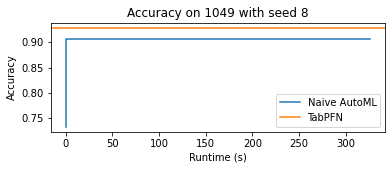

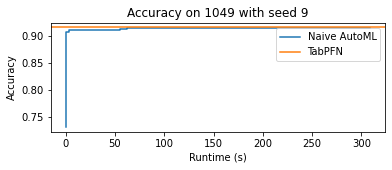

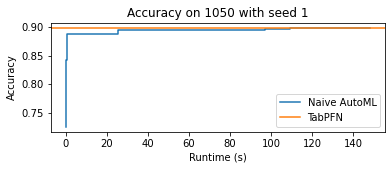

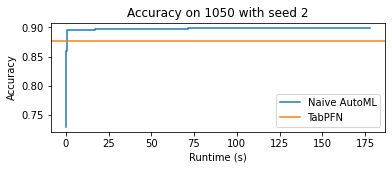

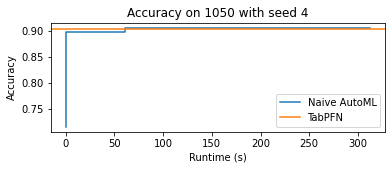

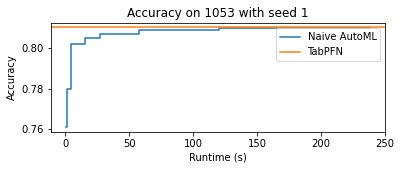

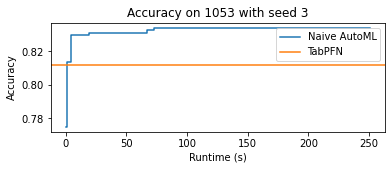

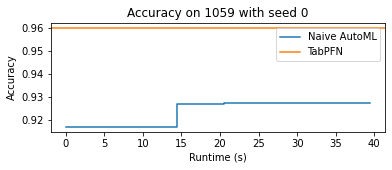

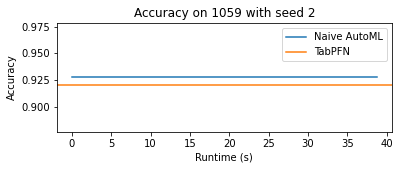

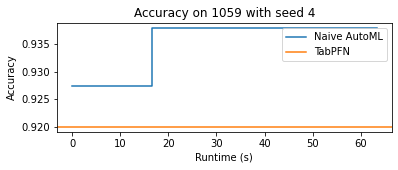

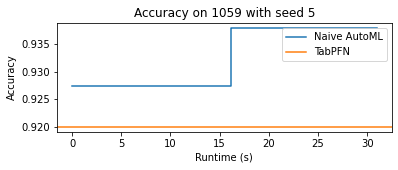

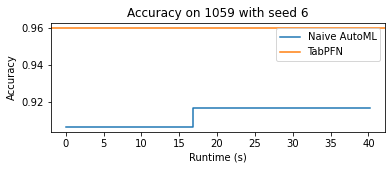

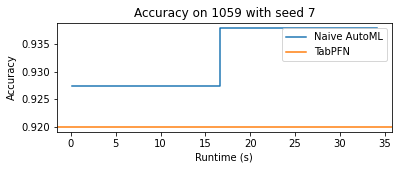

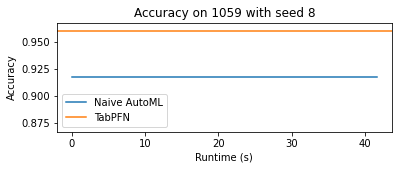

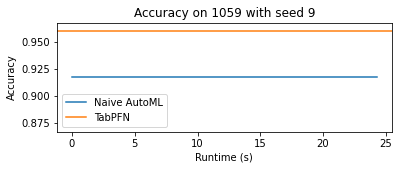

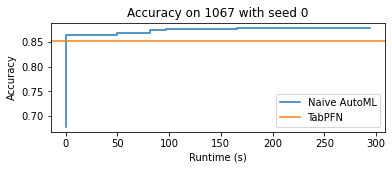

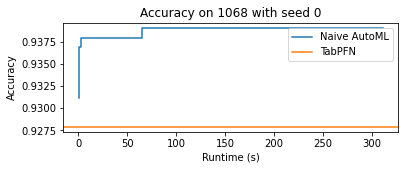

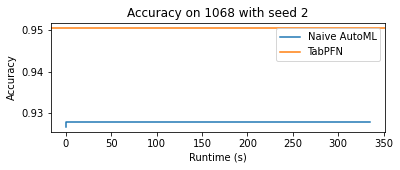

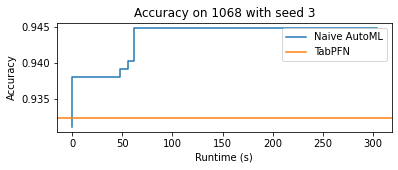

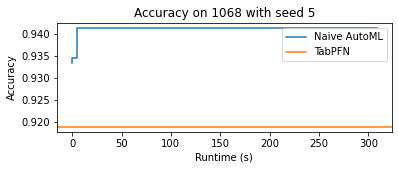

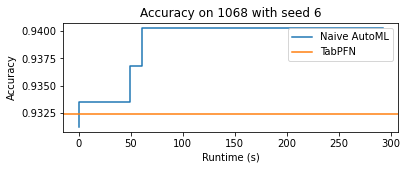

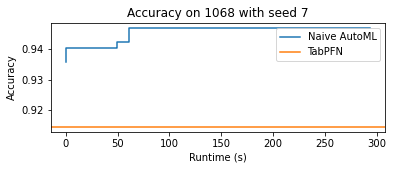

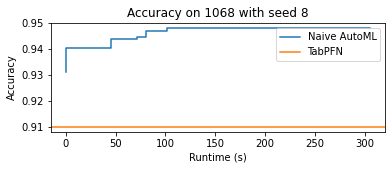

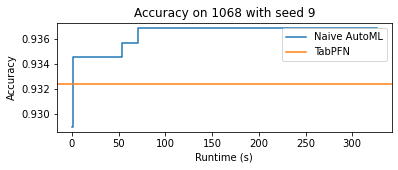

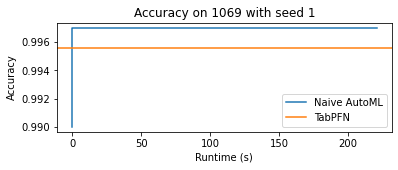

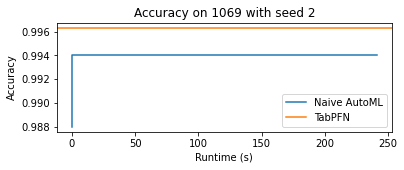

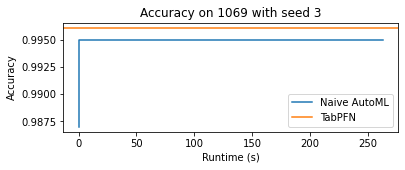

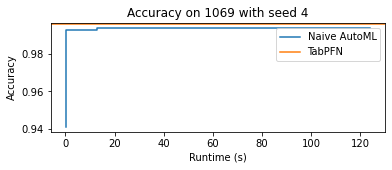

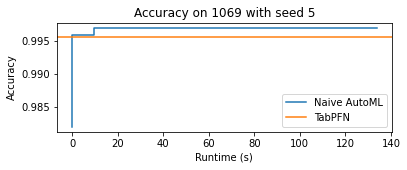

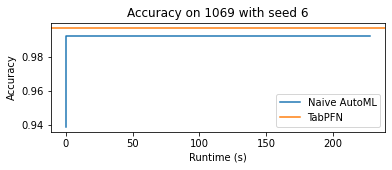

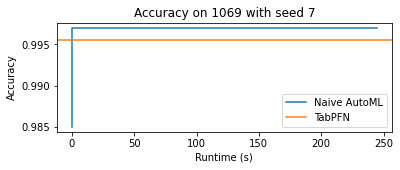

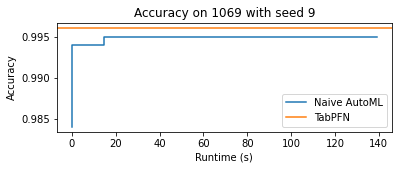

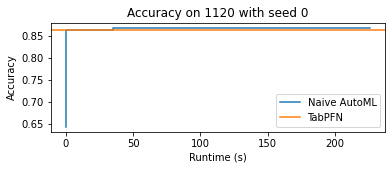

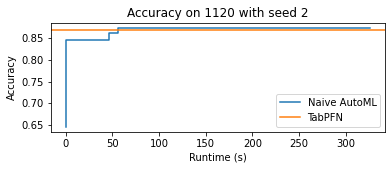

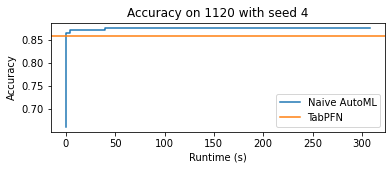

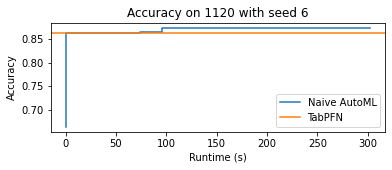

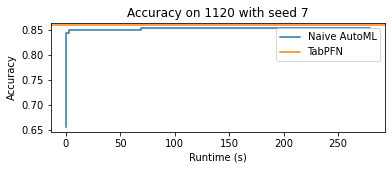

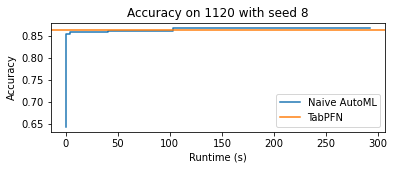

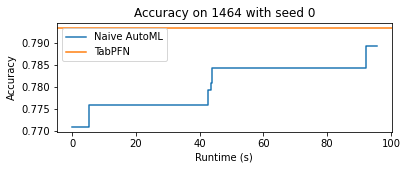

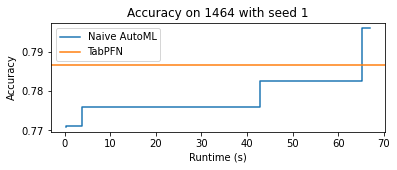

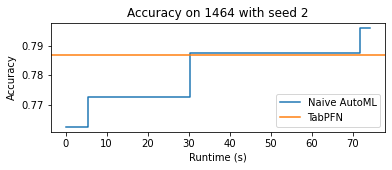

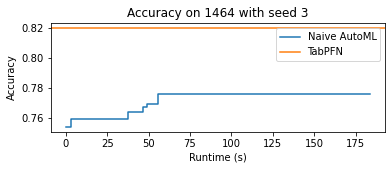

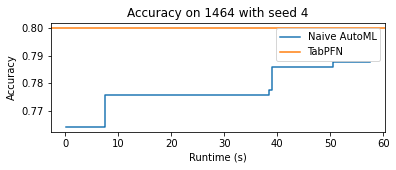

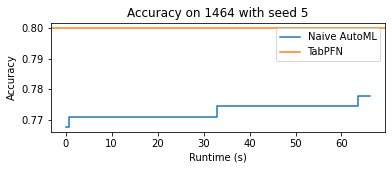

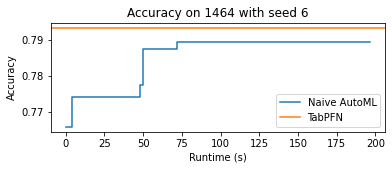

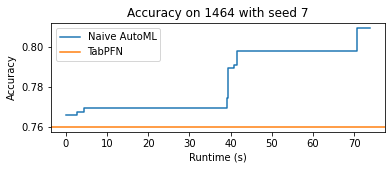

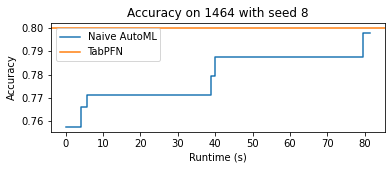

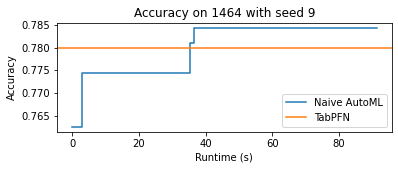

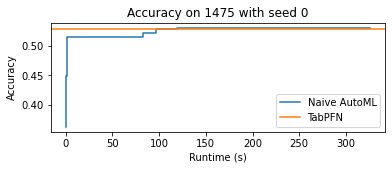

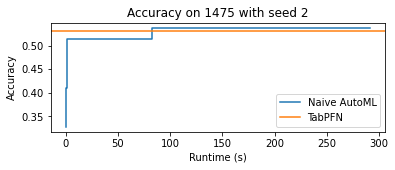

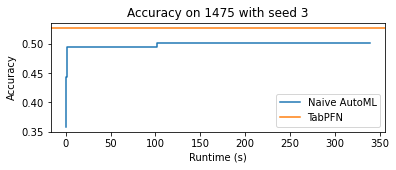

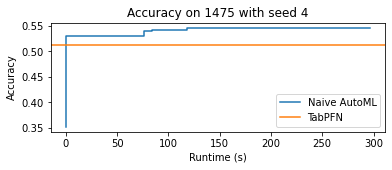

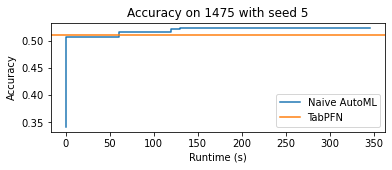

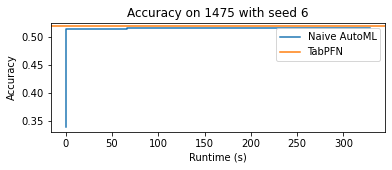

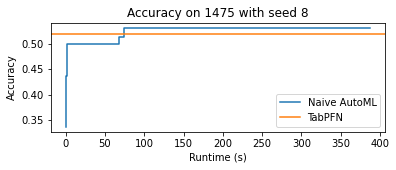

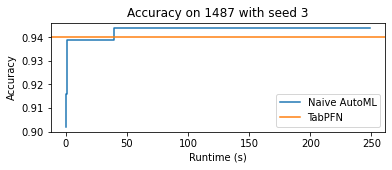

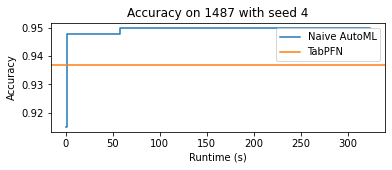

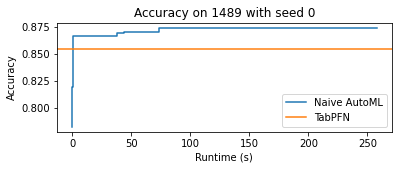

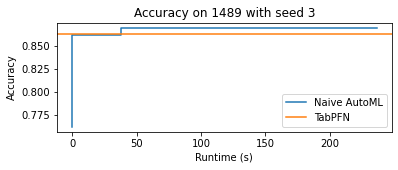

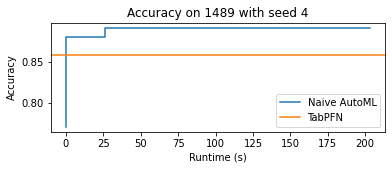

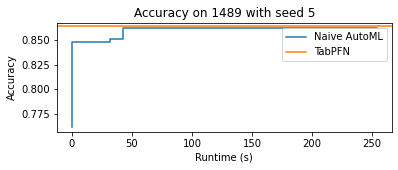

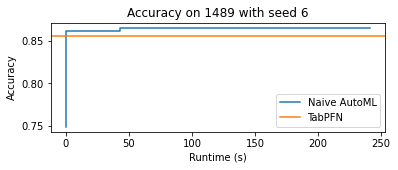

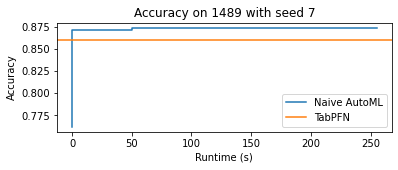

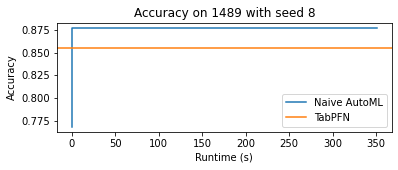

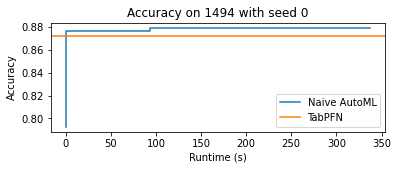

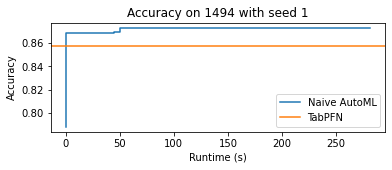

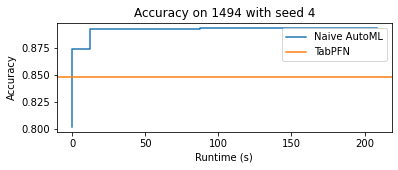

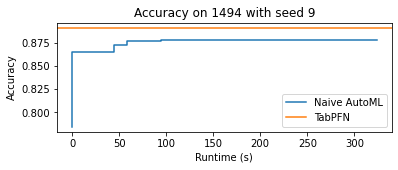

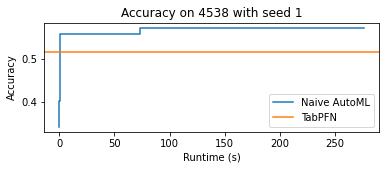

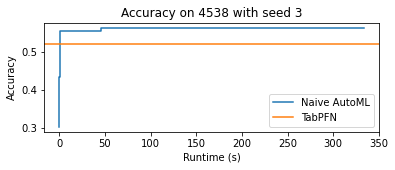

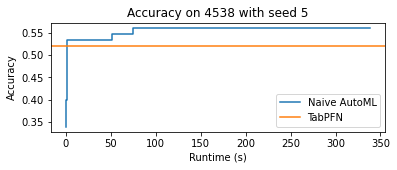

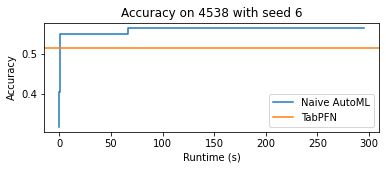

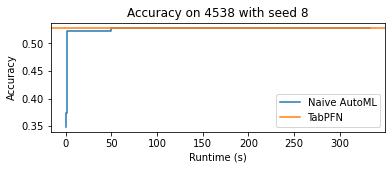

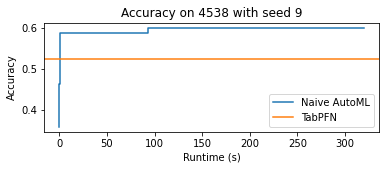

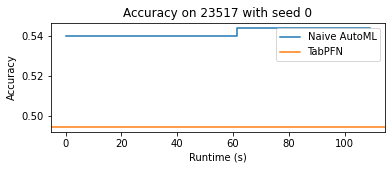

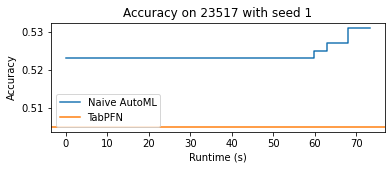

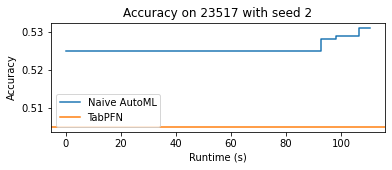

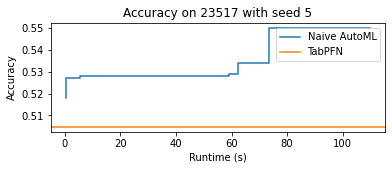

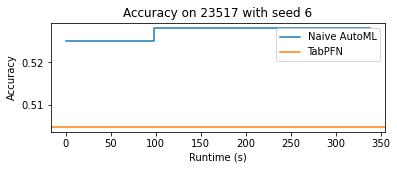

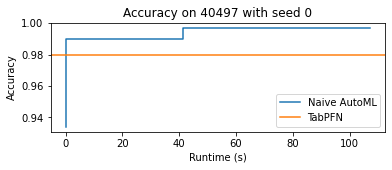

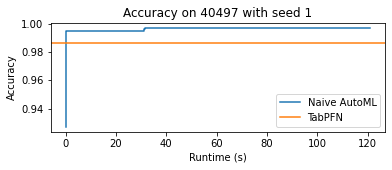

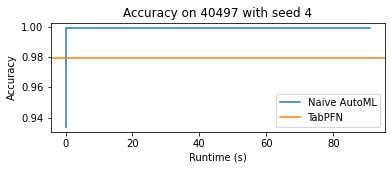

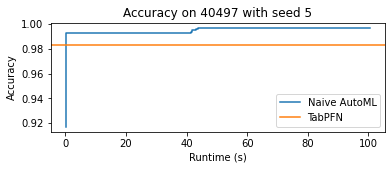

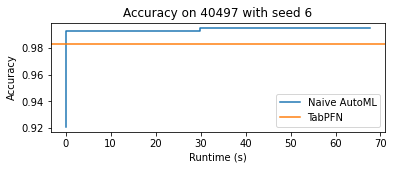

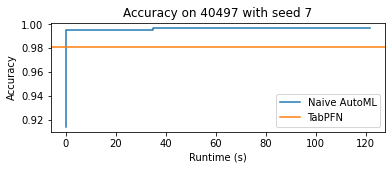

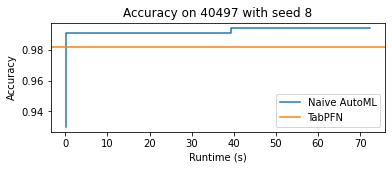

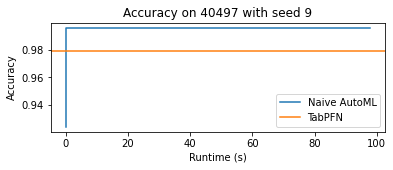

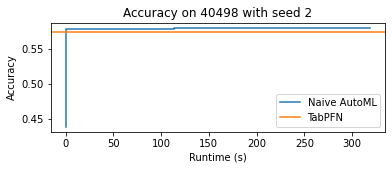

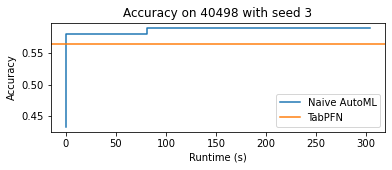

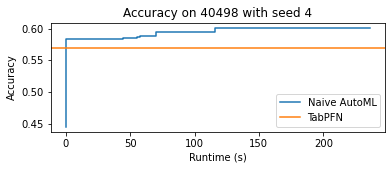

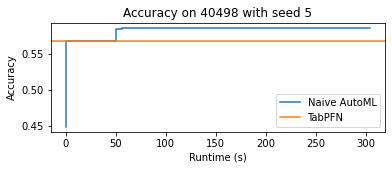

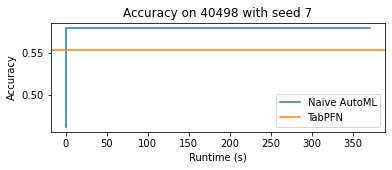

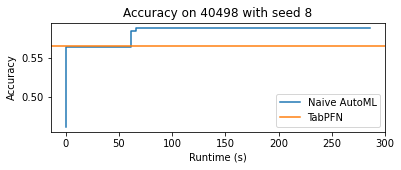

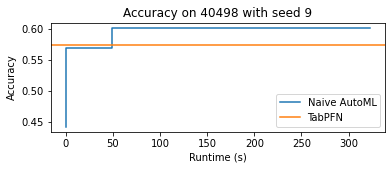

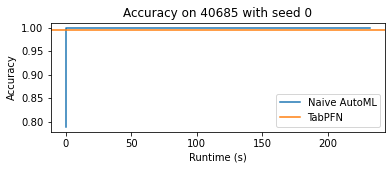

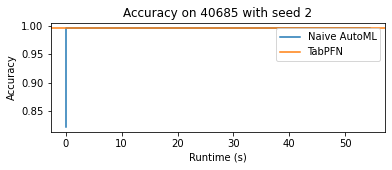

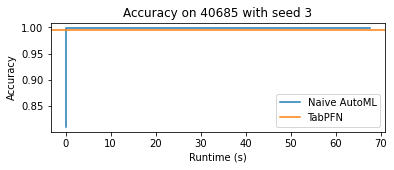

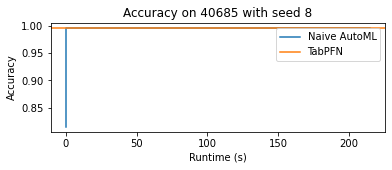

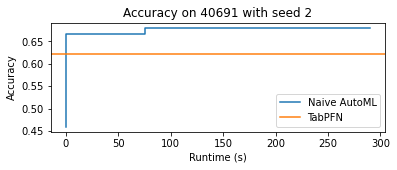

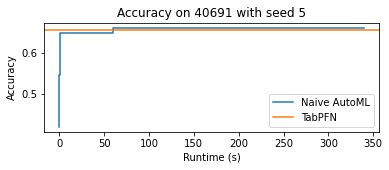

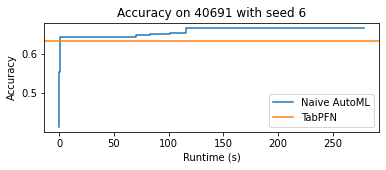

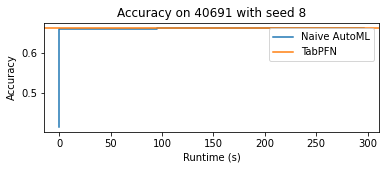

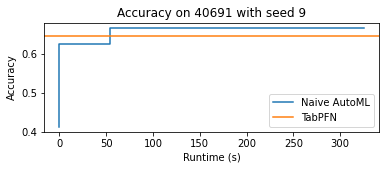

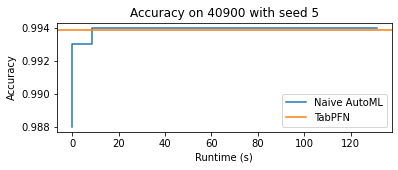

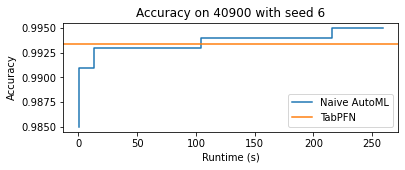

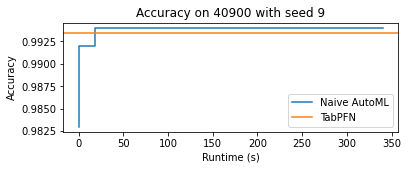

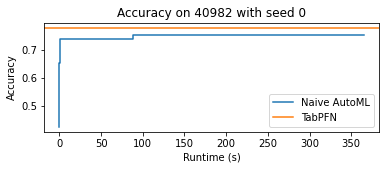

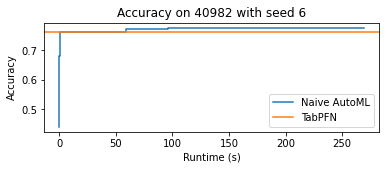

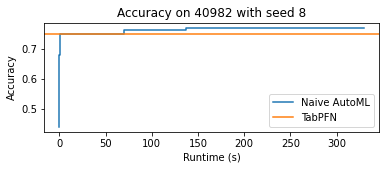

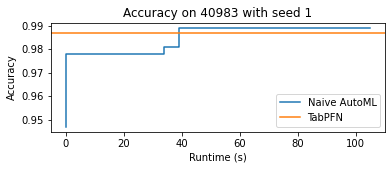

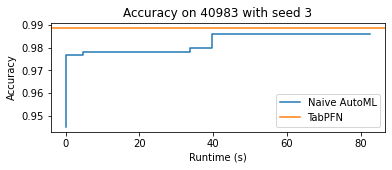

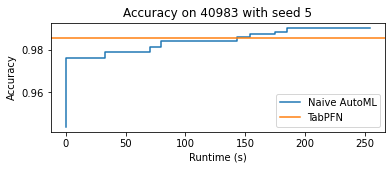

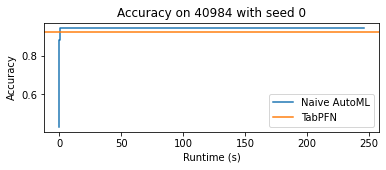

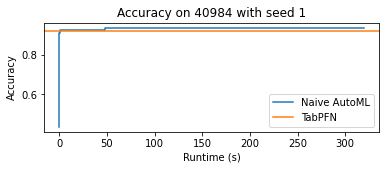

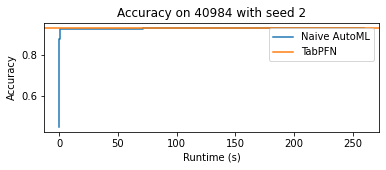

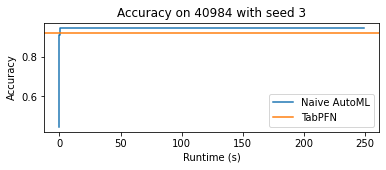

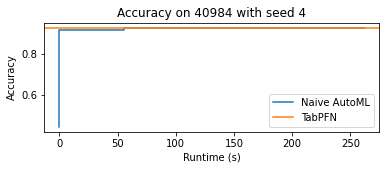

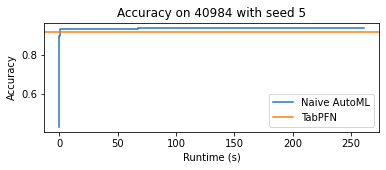

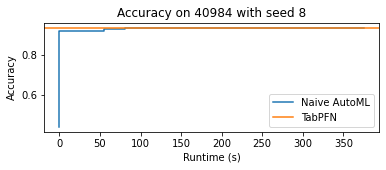

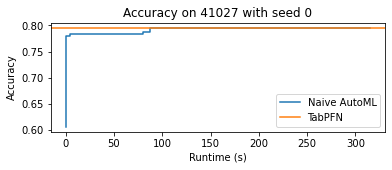

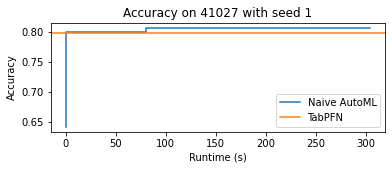

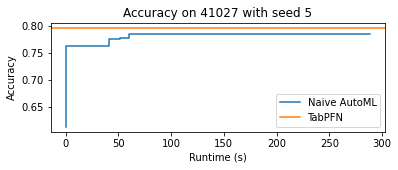

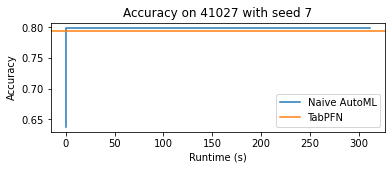

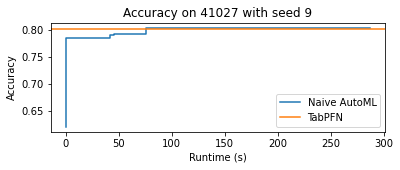

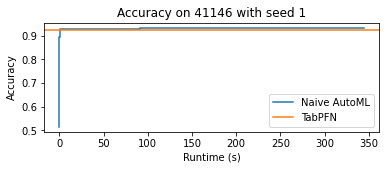

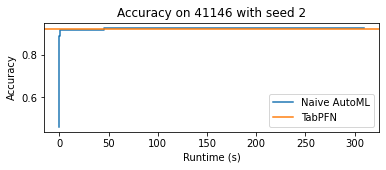

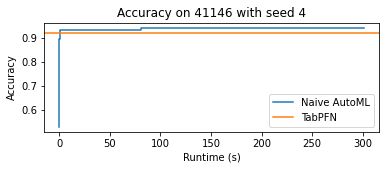

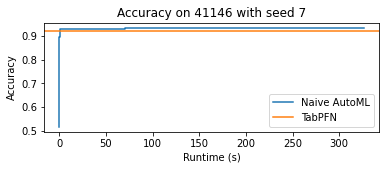

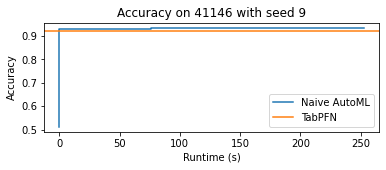

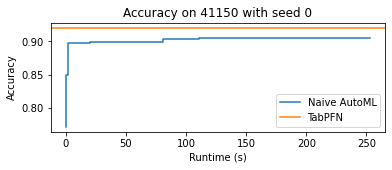

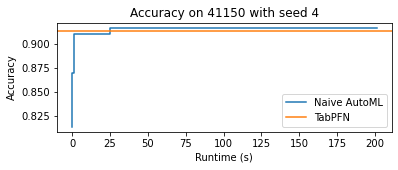

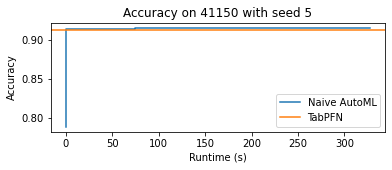

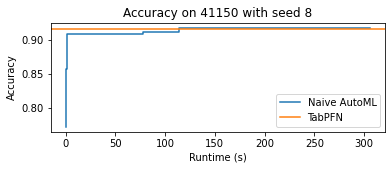

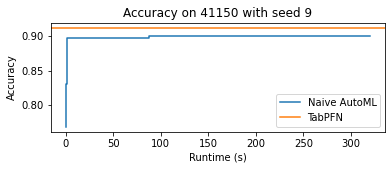

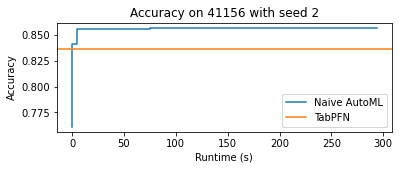

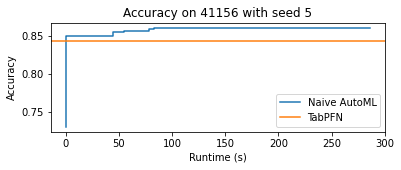

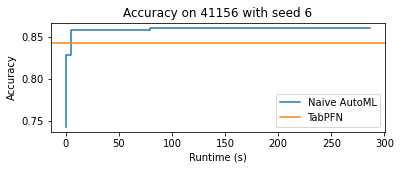

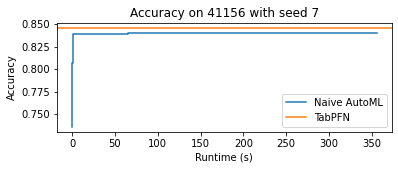

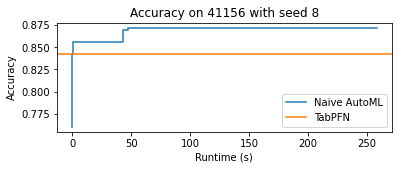

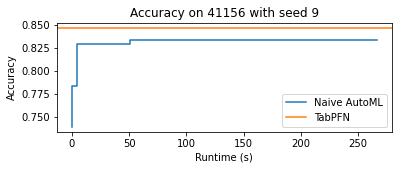

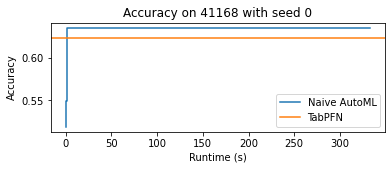

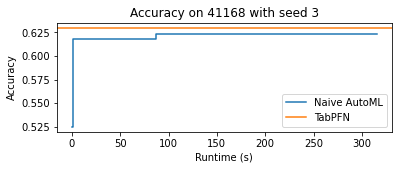

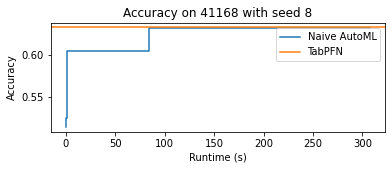

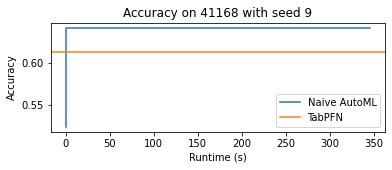

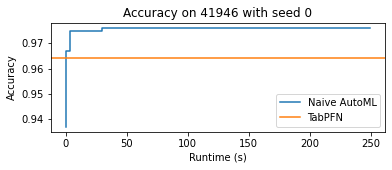

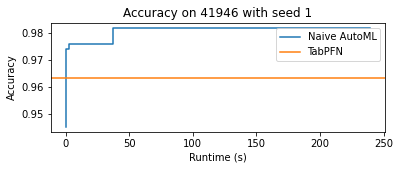

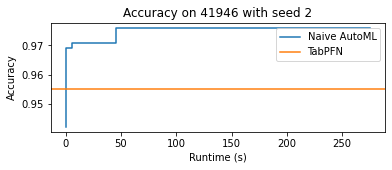

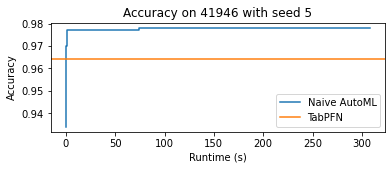

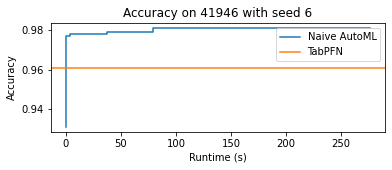

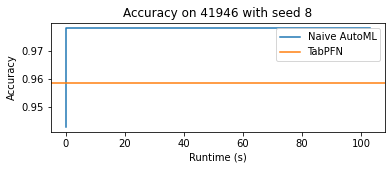

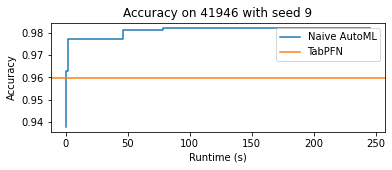

In [75]:
available_plots = []
for openmlid, df_dataset in tqdm(df.groupby("openmlid")):
    for seed, df_seed in df_dataset.groupby("seed"):
        tabpfn_score = df_seed[df_seed["algorithm"] == "tabpfn"]["test_accuracy"].values[0]
        if not np.isnan(tabpfn_score):
            try:
                naml_history = json.loads(df_seed[df_seed["algorithm"] == "naiveautoml"]["details"].values[0])
                naml_times = naml_history[0]
                naml_scores = [np.nanmax(naml_history[1][:i]) for i in range(1, 1+ len(naml_history[1]))]
                
                fig, ax = plt.subplots(figsize=(6, 2))
                ax.step(naml_times, naml_scores, label="Naive AutoML")
                ax.axhline(tabpfn_score, color="C1", label="TabPFN")
                
                ax.set_xlabel("Runtime (s)")
                ax.set_ylabel("Accuracy")
                ax.set_title(f"Accuracy on {openmlid} with seed {seed}")
                ax.legend()
                fig.savefig(f"plots/{openmlid}-{seed}.png", bbox_inches="tight")
                plt.show()
                available_plots.append((openmlid, seed))
            except:
                pass

In [76]:
cnt = 0
for openmlid, seed in available_plots:
    if seed == 0:
        cnt += 1
        print(f"![image](plots/{openmlid}-{seed}.png)")
print(cnt)

![image](plots/14-0.png)
![image](plots/16-0.png)
![image](plots/18-0.png)
![image](plots/22-0.png)
![image](plots/28-0.png)
![image](plots/30-0.png)
![image](plots/32-0.png)
![image](plots/44-0.png)
![image](plots/54-0.png)
![image](plots/60-0.png)
![image](plots/181-0.png)
![image](plots/182-0.png)
![image](plots/354-0.png)
![image](plots/679-0.png)
![image](plots/715-0.png)
![image](plots/722-0.png)
![image](plots/727-0.png)
![image](plots/728-0.png)
![image](plots/734-0.png)
![image](plots/735-0.png)
![image](plots/737-0.png)
![image](plots/740-0.png)
![image](plots/751-0.png)
![image](plots/752-0.png)
![image](plots/761-0.png)
![image](plots/772-0.png)
![image](plots/797-0.png)
![image](plots/799-0.png)
![image](plots/803-0.png)
![image](plots/807-0.png)
![image](plots/816-0.png)
![image](plots/821-0.png)
![image](plots/822-0.png)
![image](plots/823-0.png)
![image](plots/833-0.png)
![image](plots/837-0.png)
![image](plots/845-0.png)
![image](plots/846-0.png)
![image](plots/847-0.p